Business Case:

No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

PROJECT GOAL Help No-Churn with their use cases with ML

    1.Understanding the variables that are influencing the customers to migrate.
    2.Creating Churn risk scores that can be indicative to drive retention campaigns.
    3.Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers. help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.,



In [3]:
import pandas as pd
import numpy as np
import mysql.connector
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [7]:
# Fetching Records
query = "select * from telecom_churn_data"
output = pd.read_sql(query,connection)
print(output.shape)
output

(4617, 21)


columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...        99     16.78     244.7        91   
1       161.6      123     27.47  ...       103     16.62     254.4       103   
2       243.4      114     41.38  ...       110      10.3     162.6       104   
3       299.4       71      50.9  ...        88      5.26     196.9        89   
4       166.7      113     28.34  ...       122     12.61     186.9       121   
...       ...      ...       ...  ...       ...       ...       ...       ...   
4612      144       81     24.48  ...       112     15.91     158.6       122   
4613      189       91     32.13  ...        96     25.76     163.6       116   
4614    127.5      126     21.68  ...       129     25.17     200.9        91   
4615    168.9       98     28.71  ...       117     19.24     165.5        96   
4616    204.7      100      34.8  ...       107     10.78     202.8       115   

     columns16 columns17 columns18 columns19 columns20 columns21  
0        11.01        10         3       2.7         1    False.  
1        11.45      13.7         3       3.7         1    False.  
2         7.32      12.2         5      3.29         0    False.  
3         8.86       6.6         7      1.78         2    False.  
4         8.41      10.1         3      2.73         3    False.  
...        ...       ...       ...       ...       ...       ...  
4612      7.14       8.5         6       2.3         3    False.  
4613      7.36      15.7         1      4.24         3    False.  
4614      9.04        13         3      3.51         1    False.  
4615      7.45      14.3         3      3.86         0    False.  
4616      9.13      12.1         4      3.27         2    False.  

[4617 rows x 21 columns]

In [9]:
#Creating CSV File
output.to_csv('churn_data.csv')

Basic Checks:

In [12]:
#Load_data
data=pd.read_csv("churn_data.csv")
data.head(5)

Unnamed: 0 columns1  columns2  columns3   columns4 columns5 columns6  \
0           0       KS       128       415   382-4657       no      yes   
1           1       OH       107       415   371-7191       no      yes   
2           2       NJ       137       415   358-1921       no       no   
3           3       OH        84       408   375-9999      yes       no   
4           4       OK        75       415   330-6626      yes       no   

   columns7  columns8  columns9  ...  columns12  columns13  columns14  \
0        25     265.1       110  ...         99      16.78      244.7   
1        26     161.6       123  ...        103      16.62      254.4   
2         0     243.4       114  ...        110      10.30      162.6   
3         0     299.4        71  ...         88       5.26      196.9   
4         0     166.7       113  ...        122      12.61      186.9   

   columns15  columns16  columns17  columns18  columns19  columns20  columns21  
0         91      11.01       10.0          3       2.70          1     False.  
1        103      11.45       13.7          3       3.70          1     False.  
2        104       7.32       12.2          5       3.29          0     False.  
3         89       8.86        6.6          7       1.78          2     False.  
4        121       8.41       10.1          3       2.73          3     False.  

[5 rows x 22 columns]

In [14]:
data.tail()

Unnamed: 0 columns1  columns2  columns3   columns4 columns5 columns6  \
4612        4612       NY        57       510   345-7512       no      yes   
4613        4613       NM       177       408   343-6820       no      yes   
4614        4614       VT        67       408   338-4794       no      yes   
4615        4615       MI        98       415   355-8388       no      yes   
4616        4616       IN       140       415   409-6884       no       no   

      columns7  columns8  columns9  ...  columns12  columns13  columns14  \
4612        25     144.0        81  ...        112      15.91      158.6   
4613        29     189.0        91  ...         96      25.76      163.6   
4614        33     127.5       126  ...        129      25.17      200.9   
4615        23     168.9        98  ...        117      19.24      165.5   
4616         0     204.7       100  ...        107      10.78      202.8   

      columns15  columns16  columns17  columns18  columns19  columns20  \
4612        122       7.14        8.5          6       2.30          3   
4613        116       7.36       15.7          1       4.24          3   
4614         91       9.04       13.0          3       3.51          1   
4615         96       7.45       14.3          3       3.86          0   
4616        115       9.13       12.1          4       3.27          2   

      columns21  
4612     False.  
4613     False.  
4614     False.  
4615     False.  
4616     False.  

[5 rows x 22 columns]

In [16]:
data.describe()

Unnamed: 0     columns2     columns3     columns7     columns8  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean   2308.000000   100.645224   437.046350     7.849903   180.447152   
std    1332.957426    39.597194    42.288212    13.592333    53.983540   
min       0.000000     1.000000   408.000000     0.000000     0.000000   
25%    1154.000000    74.000000   408.000000     0.000000   143.700000   
50%    2308.000000   100.000000   415.000000     0.000000   180.000000   
75%    3462.000000   127.000000   510.000000    17.000000   216.800000   
max    4616.000000   243.000000   510.000000    51.000000   351.500000   

          columns9    columns10    columns11    columns12    columns13  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean    100.054364    30.676576   200.429088   100.179770    17.036703   
std      19.883027     9.177145    50.557001    19.821314     4.297332   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      87.000000    24.430000   165.900000    87.000000    14.100000   
50%     100.000000    30.600000   200.800000   101.000000    17.070000   
75%     113.000000    36.860000   234.000000   114.000000    19.890000   
max     165.000000    59.760000   363.700000   170.000000    30.910000   

         columns14    columns15    columns16    columns17    columns18  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean    200.623933    99.944120     9.028185    10.279294     4.433831   
std      50.543616    19.935053     2.274488     2.757361     2.457615   
min      23.200000    12.000000     1.040000     0.000000     0.000000   
25%     167.100000    87.000000     7.520000     8.600000     3.000000   
50%     200.800000   100.000000     9.040000    10.300000     4.000000   
75%     234.900000   113.000000    10.570000    12.100000     6.000000   
max     395.000000   175.000000    17.770000    20.000000    20.000000   

         columns19    columns20  
count  4617.000000  4617.000000  
mean      2.775926     1.567035  
std       0.744413     1.307019  
min       0.000000     0.000000  
25%       2.320000     1.000000  
50%       2.780000     1.000000  
75%       3.270000     2.000000  
max       5.400000     9.000000

In [18]:
#dropping irrelevant column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
data.rename(columns={'columns1':'State','columns2':'Account_Length','columns3':'Area_Code','columns4':'Phone','columns5':'International_plan',
                    'columns6':'VMail_Plan','columns7':'Vmail_Message','columns8':'Day_Mins','columns9':'Day_Calls','columns10':'Day_Charge',
                    'columns11':'Eve_Mins','columns12':'Eve_Calls','columns13':'Eve_Charge','columns14':'Night_Mins','columns15':'Night_Calls',
                    'columns16':'Night_Charge','columns17':'International_mins','columns18':'International_calls','columns19':'International Charge',
                    'columns20':'CustServ_Calls','columns21':'Churn'},inplace=True)

In [22]:
data

State  Account_Length  Area_Code      Phone International_plan  \
0       KS             128        415   382-4657                 no   
1       OH             107        415   371-7191                 no   
2       NJ             137        415   358-1921                 no   
3       OH              84        408   375-9999                yes   
4       OK              75        415   330-6626                yes   
...    ...             ...        ...        ...                ...   
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     VMail_Plan  Vmail_Message  Day_Mins  Day_Calls  Day_Charge  ...  \
0           yes             25     265.1        110       45.07  ...   
1           yes             26     161.6        123       27.47  ...   
2            no              0     243.4        114       41.38  ...   
3            no              0     299.4         71       50.90  ...   
4            no              0     166.7        113       28.34  ...   
...         ...            ...       ...        ...         ...  ...   
4612        yes             25     144.0         81       24.48  ...   
4613        yes             29     189.0         91       32.13  ...   
4614        yes             33     127.5        126       21.68  ...   
4615        yes             23     168.9         98       28.71  ...   
4616         no              0     204.7        100       34.80  ...   

      Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4612        112       15.91       158.6          122          7.14   
4613         96       25.76       163.6          116          7.36   
4614        129       25.17       200.9           91          9.04   
4615        117       19.24       165.5           96          7.45   
4616        107       10.78       202.8          115          9.13   

      International_mins  International_calls  International Charge  \
0                   10.0                    3                  2.70   
1                   13.7                    3                  3.70   
2                   12.2                    5                  3.29   
3                    6.6                    7                  1.78   
4                   10.1                    3                  2.73   
...                  ...                  ...                   ...   
4612                 8.5                    6                  2.30   
4613                15.7                    1                  4.24   
4614                13.0                    3                  3.51   
4615                14.3                    3                  3.86   
4616                12.1                    4                  3.27   

      CustServ_Calls    Churn  
0                  1   False.  
1                  1   False.  
2                  0   False.  
3                  2   False.  
4                  3   False.  
...              ...      ...  
4612               3   False.  
4613               3   False.  
4614               1   False.  
4615               0   False.  
4616               2   False.  

[4617 rows x 21 columns]

Data Preprocessing:

In [25]:
data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_plan      0
VMail_Plan              0
Vmail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_mins      0
International_calls     0
International Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [27]:
data.describe().T

count        mean        std     min     25%     50%  \
Account_Length        4617.0  100.645224  39.597194    1.00   74.00  100.00   
Area_Code             4617.0  437.046350  42.288212  408.00  408.00  415.00   
Vmail_Message         4617.0    7.849903  13.592333    0.00    0.00    0.00   
Day_Mins              4617.0  180.447152  53.983540    0.00  143.70  180.00   
Day_Calls             4617.0  100.054364  19.883027    0.00   87.00  100.00   
Day_Charge            4617.0   30.676576   9.177145    0.00   24.43   30.60   
Eve_Mins              4617.0  200.429088  50.557001    0.00  165.90  200.80   
Eve_Calls             4617.0  100.179770  19.821314    0.00   87.00  101.00   
Eve_Charge            4617.0   17.036703   4.297332    0.00   14.10   17.07   
Night_Mins            4617.0  200.623933  50.543616   23.20  167.10  200.80   
Night_Calls           4617.0   99.944120  19.935053   12.00   87.00  100.00   
Night_Charge          4617.0    9.028185   2.274488    1.04    7.52    9.04   
International_mins    4617.0   10.279294   2.757361    0.00    8.60   10.30   
International_calls   4617.0    4.433831   2.457615    0.00    3.00    4.00   
International Charge  4617.0    2.775926   0.744413    0.00    2.32    2.78   
CustServ_Calls        4617.0    1.567035   1.307019    0.00    1.00    1.00   

                         75%     max  
Account_Length        127.00  243.00  
Area_Code             510.00  510.00  
Vmail_Message          17.00   51.00  
Day_Mins              216.80  351.50  
Day_Calls             113.00  165.00  
Day_Charge             36.86   59.76  
Eve_Mins              234.00  363.70  
Eve_Calls             114.00  170.00  
Eve_Charge             19.89   30.91  
Night_Mins            234.90  395.00  
Night_Calls           113.00  175.00  
Night_Charge           10.57   17.77  
International_mins     12.10   20.00  
International_calls     6.00   20.00  
International Charge    3.27    5.40  
CustServ_Calls          2.00    9.00

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   Vmail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [31]:
data.Churn.value_counts()

Churn
False.    3961
True.      656
Name: count, dtype: int64

In [33]:
data. International_plan.value_counts()

International_plan
no     4171
yes     446
Name: count, dtype: int64

In [35]:
data.VMail_Plan.value_counts() 

VMail_Plan
no     3381
yes    1236
Name: count, dtype: int64

In [37]:
data.Phone.value_counts()

Phone
382-4657    1
359-5091    1
347-3895    1
371-9414    1
415-8200    1
           ..
353-6038    1
341-7686    1
384-8723    1
328-2982    1
409-6884    1
Name: count, Length: 4617, dtype: int64

In [39]:
data.Day_Charge.value_counts()

Day_Charge
26.18    10
32.18    10
30.11     9
27.12     9
31.37     9
         ..
43.40     1
7.12      1
40.70     1
19.23     1
21.68     1
Name: count, Length: 1901, dtype: int64

In [41]:
data.Eve_Calls.value_counts()

Eve_Calls
105    111
97     101
103     99
94      99
101     98
      ... 
12       1
49       1
37       1
42       1
169      1
Name: count, Length: 125, dtype: int64

In [43]:
data.Night_Charge.value_counts()

Night_Charge
9.66     19
8.47     18
10.80    17
8.15     17
9.40     16
         ..
15.56     1
12.32     1
13.29     1
4.92      1
5.60      1
Name: count, Length: 1012, dtype: int64

In [45]:
data.Night_Mins.value_counts()

Night_Mins
194.3    10
214.6    10
188.2    10
186.2    10
214.7     9
         ..
118.5     1
284.7     1
139.5     1
269.6     1
124.4     1
Name: count, Length: 1813, dtype: int64

In [47]:
data.International_calls.value_counts()

International_calls
3     925
4     881
2     680
5     646
6     460
7     283
1     245
8     156
9     141
10     70
11     38
0      23
12     21
13     19
15      9
14      6
16      6
18      4
19      2
20      1
17      1
Name: count, dtype: int64

In [49]:
data.CustServ_Calls.value_counts()

CustServ_Calls
1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: count, dtype: int64

In [51]:
data.shape

(4617, 21)

In [53]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_plan',
       'VMail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_mins', 'International_calls',
       'International Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [55]:
data.groupby('International_plan')['Area_Code'].median()

International_plan
no     415.0
yes    415.0
Name: Area_Code, dtype: float64

In [57]:
data.groupby('Churn')['Day_Mins'].median()

Churn
False.    178.10
True.     214.15
Name: Day_Mins, dtype: float64

In [59]:
data.groupby('VMail_Plan')['Day_Mins'].mean()

VMail_Plan
no     180.302130
yes    180.843851
Name: Day_Mins, dtype: float64

In [61]:
data.groupby('Vmail_Message')['CustServ_Calls'].median()

Vmail_Message
0     1.0
4     3.0
6     2.5
8     1.5
9     1.5
10    0.5
11    1.5
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    2.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.5
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    2.0
43    2.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    2.0
51    1.0
Name: CustServ_Calls, dtype: float64

Exploratory Data Analysis (EDA)

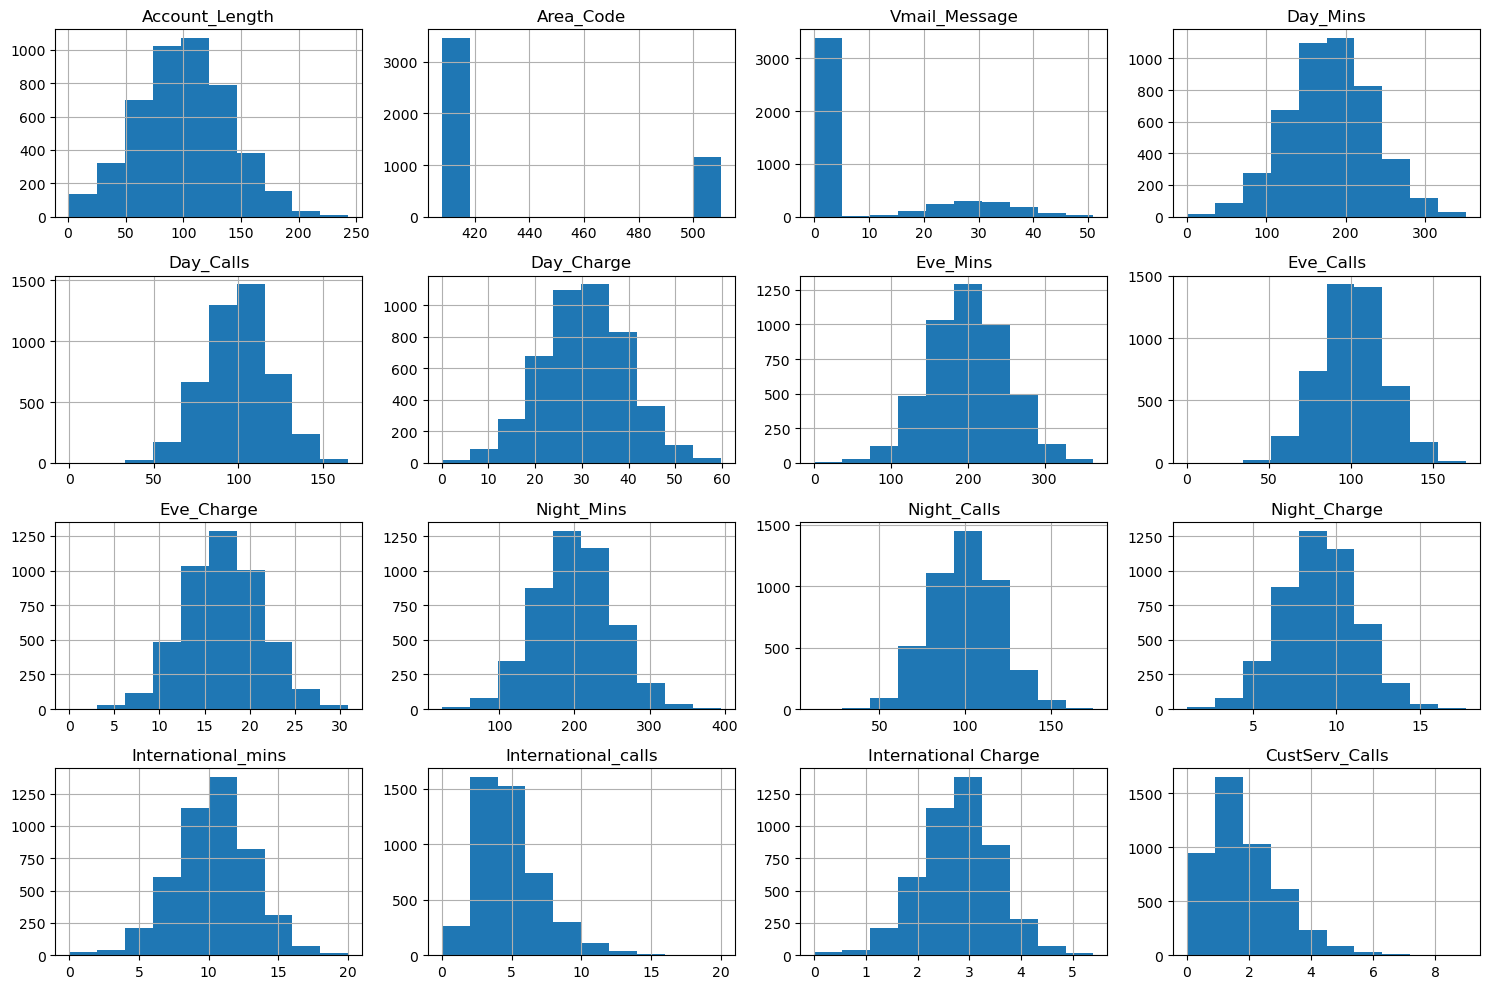

In [66]:
#Histogram for Numeric Columns
import matplotlib.pyplot as plt
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

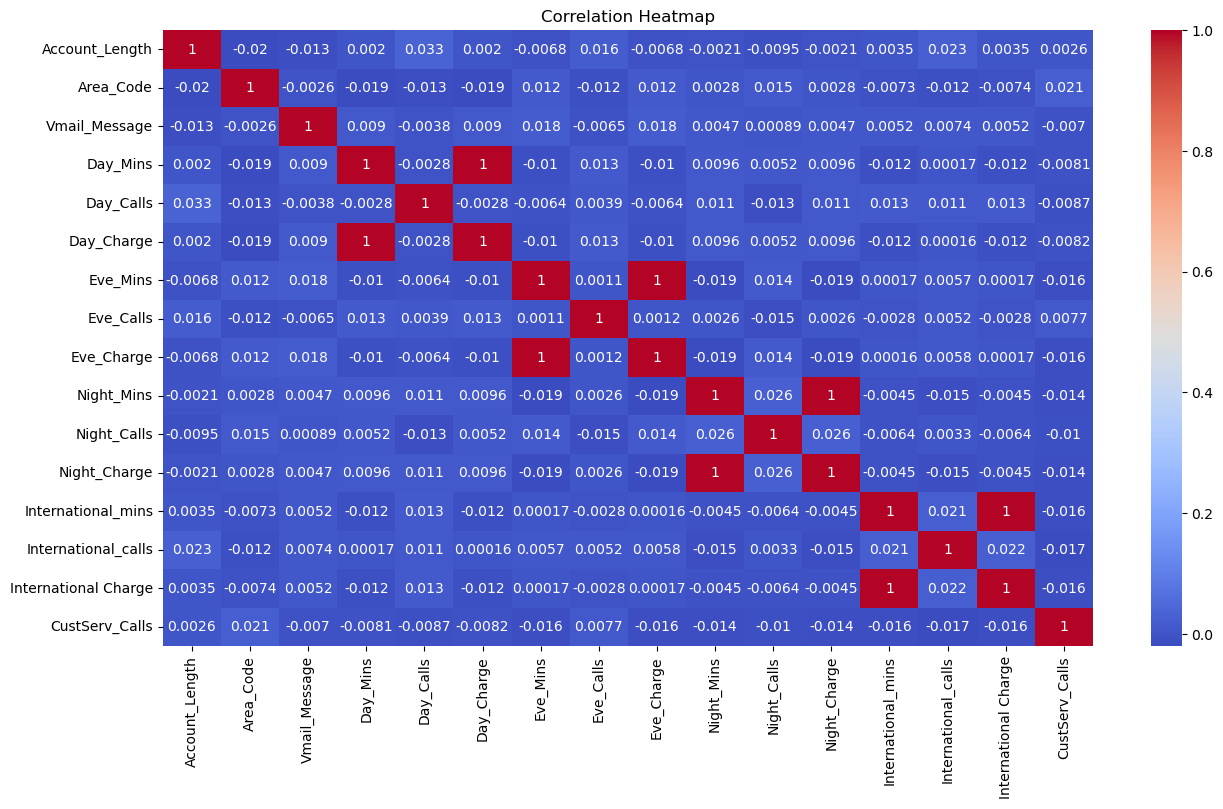

In [68]:
#Correlation Heatmap for Numeric Columns
# Select only numeric columns
import seaborn as sns
numeric_columns = data.select_dtypes(include=[ 'int64','float64'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

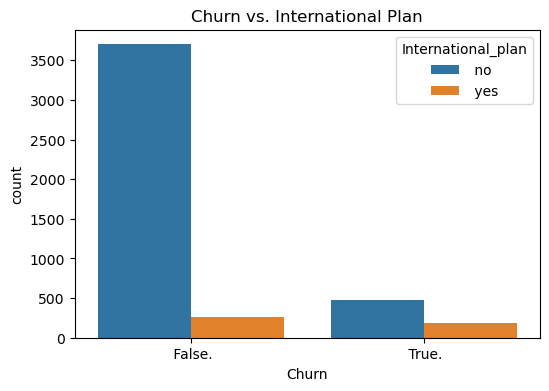

In [70]:
# Bivariate analysis for 'Churn' and 'International_plan'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue='International_plan', data=data)
plt.title('Churn vs. International Plan')
plt.show()

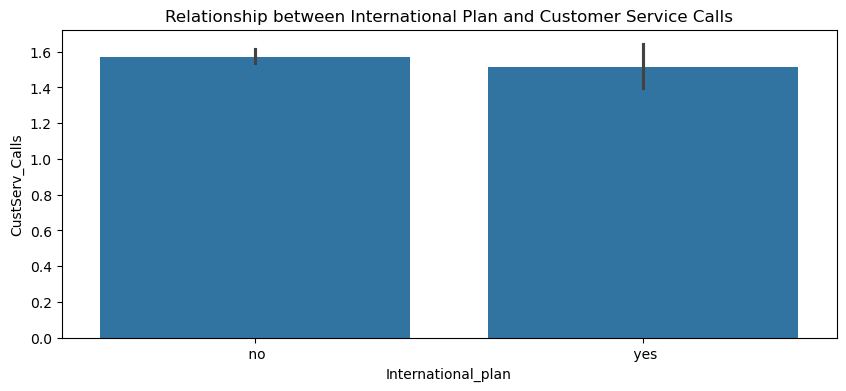

In [72]:
#Relationship between 'International_plan' and 'CustServ_Calls'
plt.figure(figsize=(10, 4))
sns.barplot(x='International_plan', y='CustServ_Calls', data=data)
plt.title('Relationship between International Plan and Customer Service Calls')
plt.show()

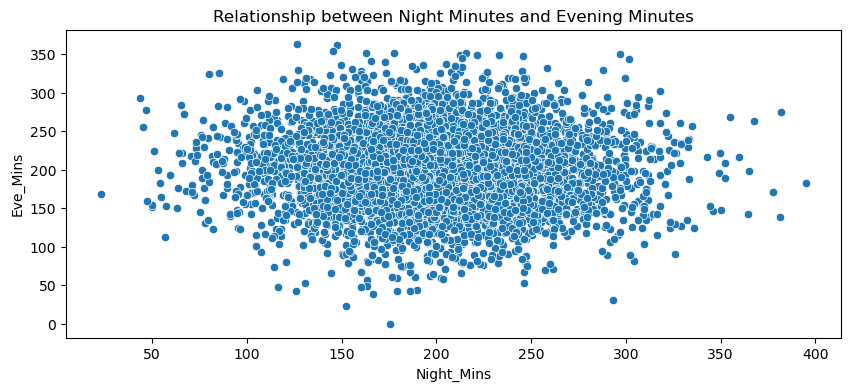

In [74]:
#Relationship between 'Night_Mins' and 'Eve_Mins'
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Night_Mins', y='Eve_Mins', data=data)
plt.title('Relationship between Night Minutes and Evening Minutes')
plt.show()

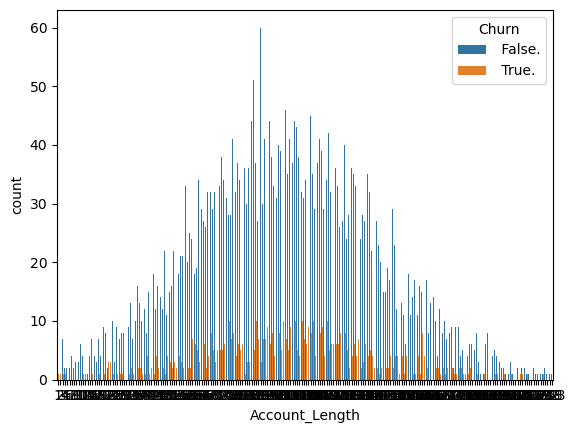

In [76]:
sns.countplot(x='Account_Length',hue='Churn',data=data)
plt.show()

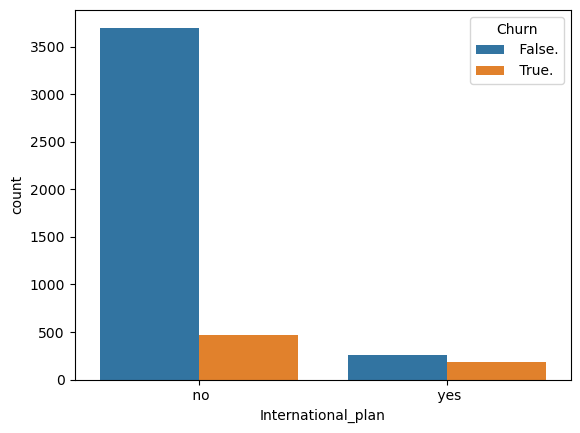

In [78]:
sns.countplot(x='International_plan',hue='Churn',data=data)
plt.show()

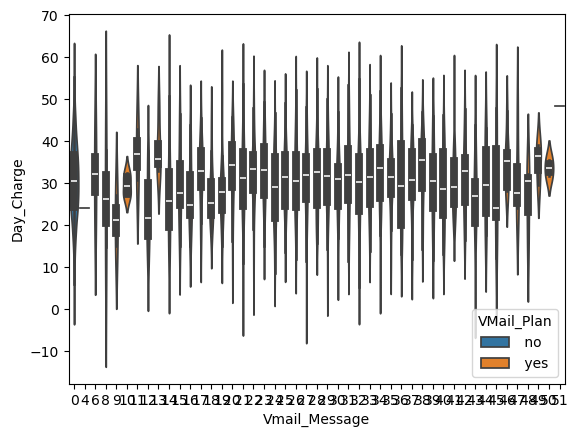

In [80]:
sns.violinplot(x='Vmail_Message',y='Day_Charge',data=data,hue='VMail_Plan')
plt.show()

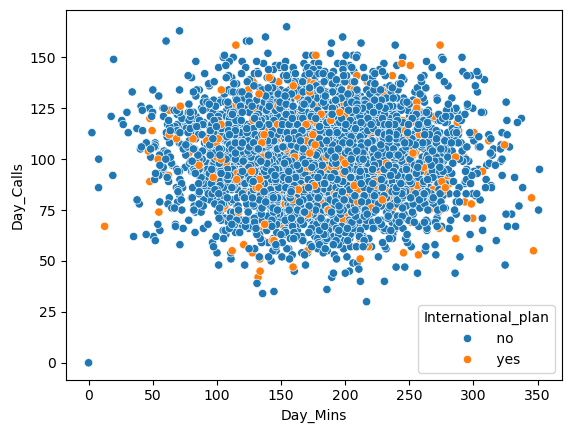

In [82]:
sns.scatterplot(x='Day_Mins',y='Day_Calls',data=data,hue='International_plan')
plt.show()

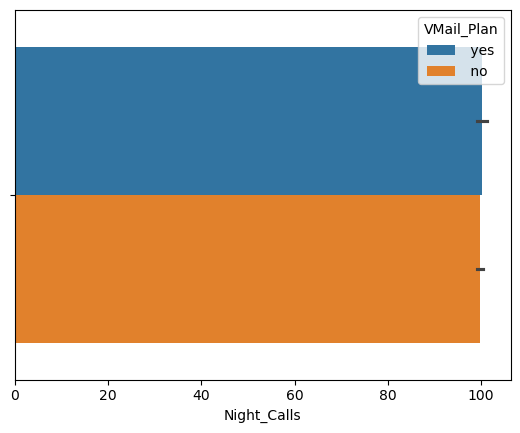

In [84]:
sns.barplot(x='Night_Calls',data=data,hue='VMail_Plan')
plt.show()

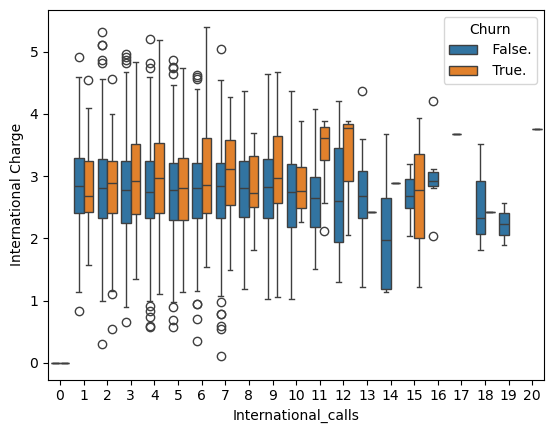

In [86]:
sns.boxplot(x='International_calls',y='International Charge',data=data,hue='Churn')
plt.show()

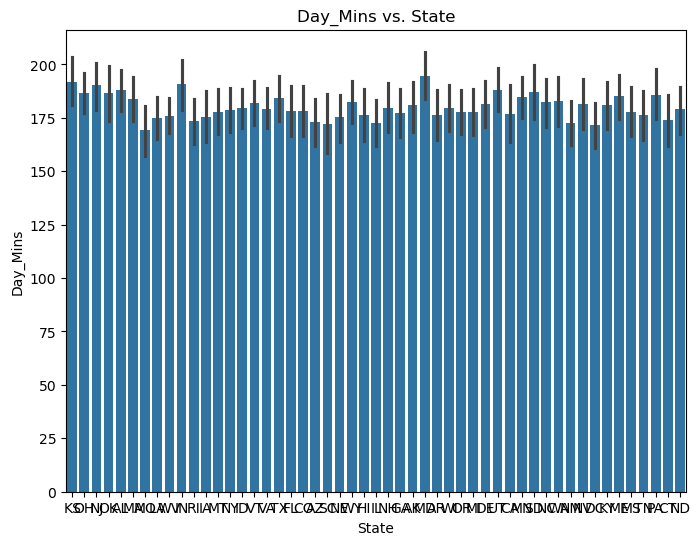

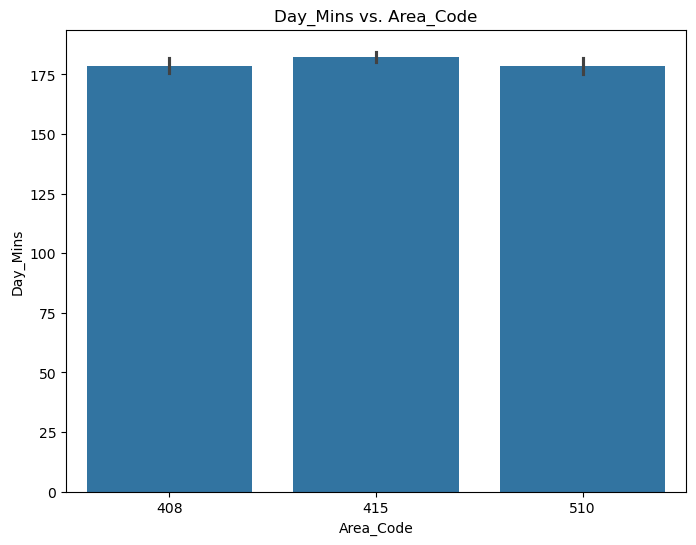

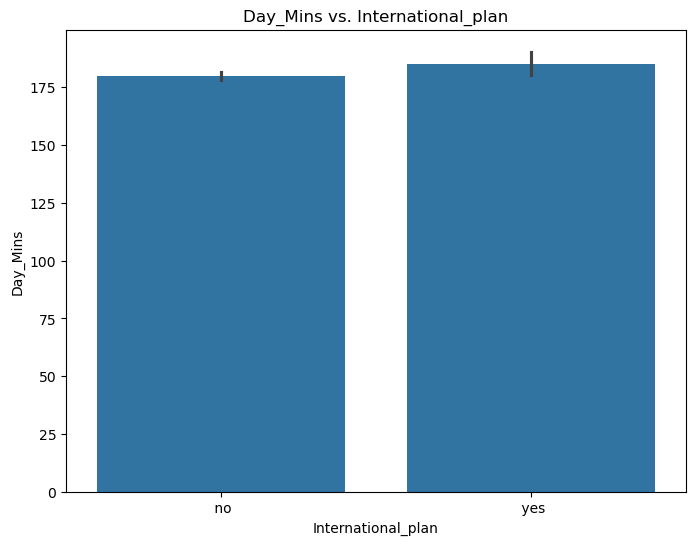

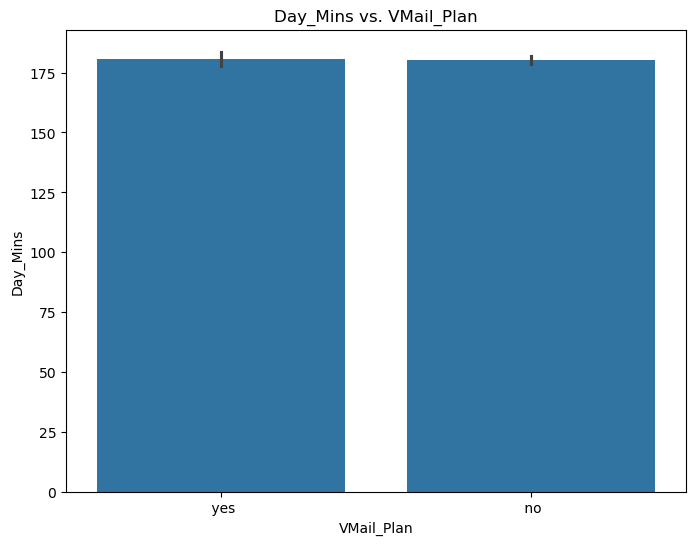

<Figure size 800x600 with 0 Axes>

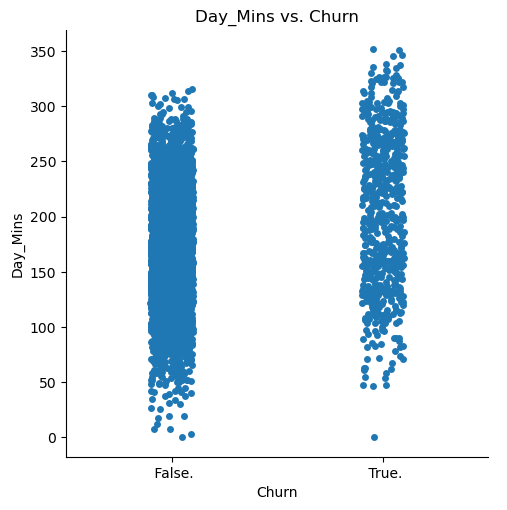

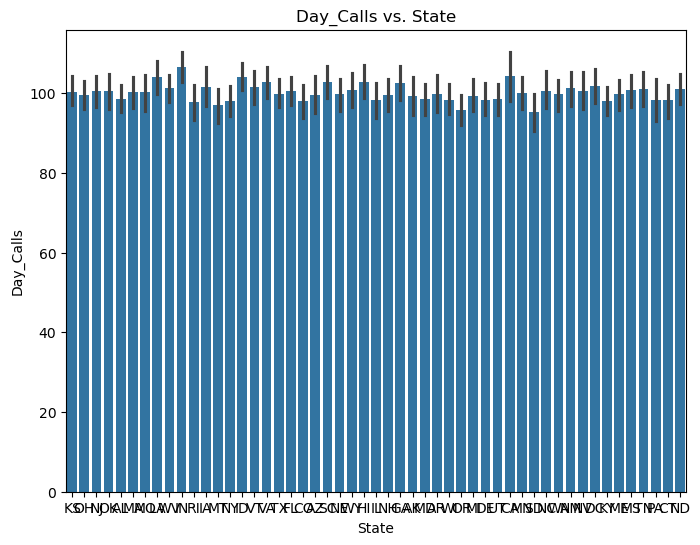

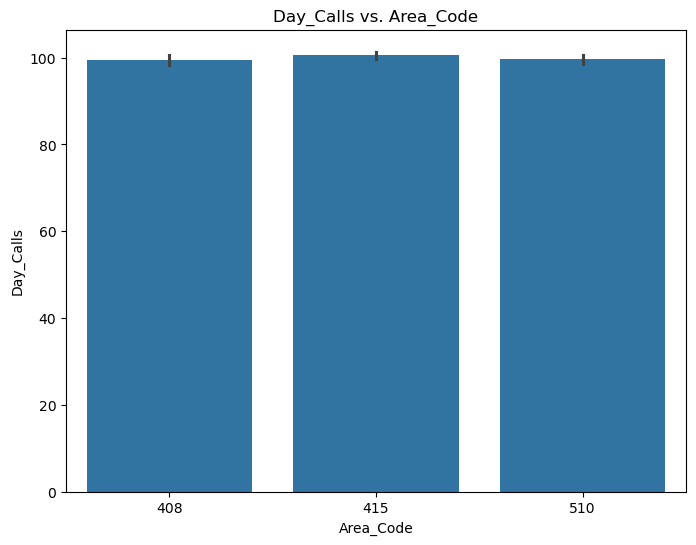

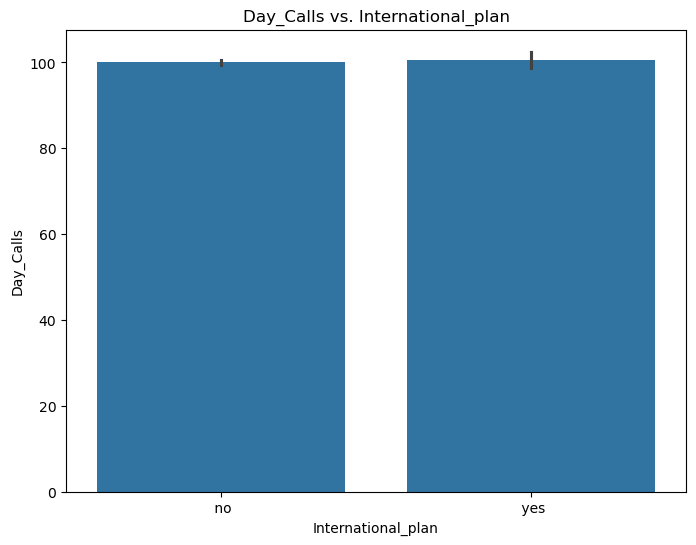

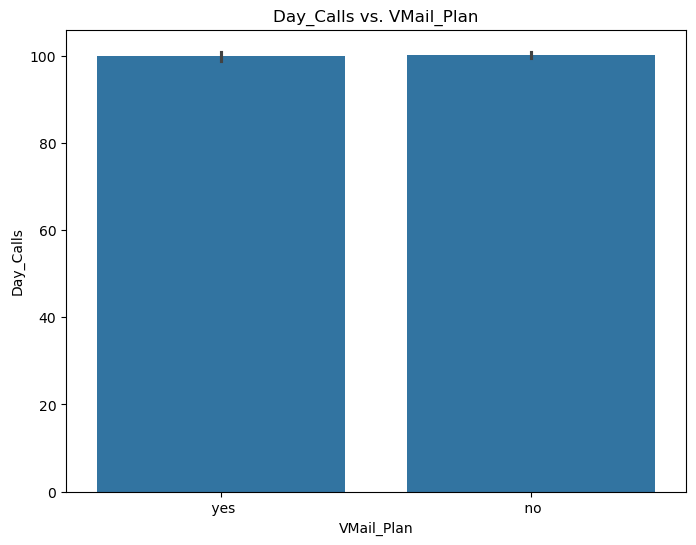

<Figure size 800x600 with 0 Axes>

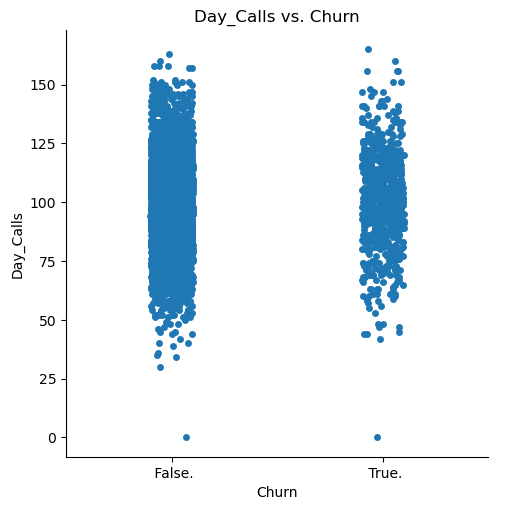

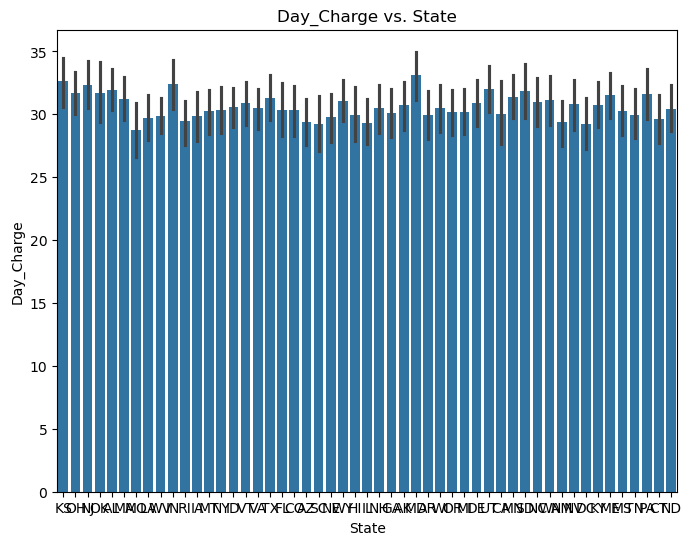

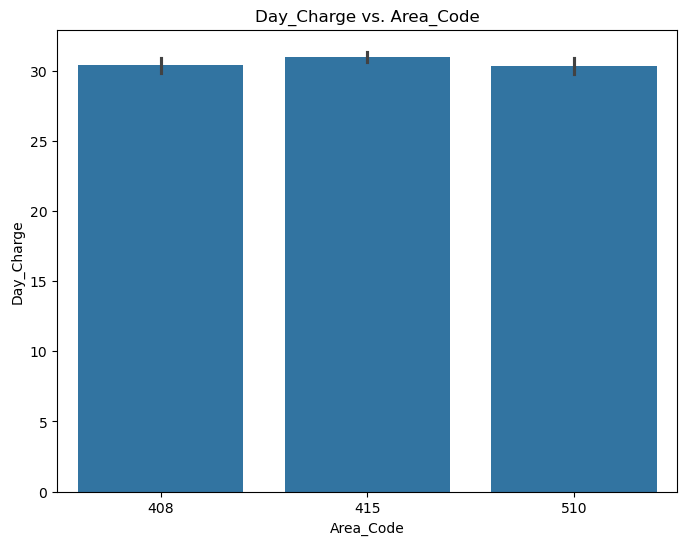

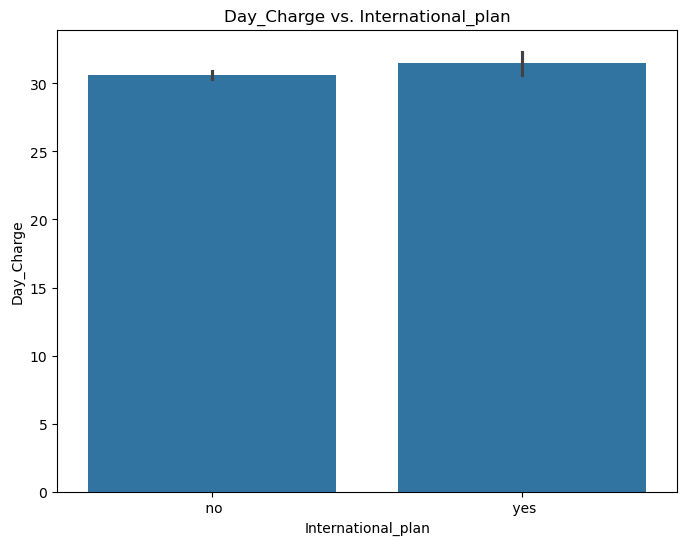

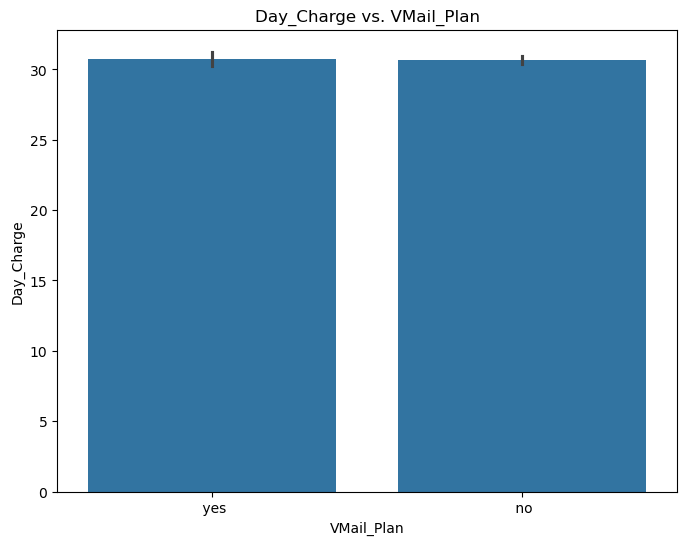

<Figure size 800x600 with 0 Axes>

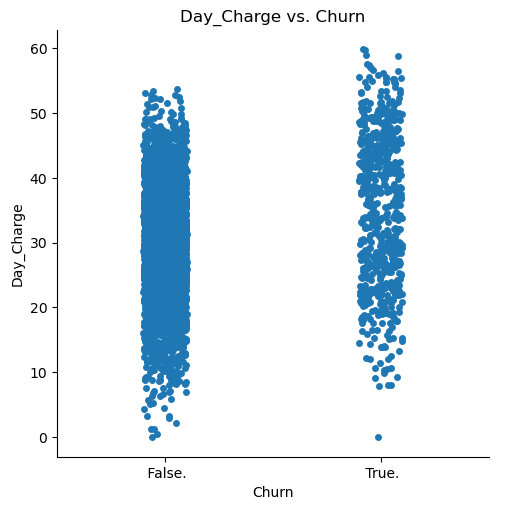

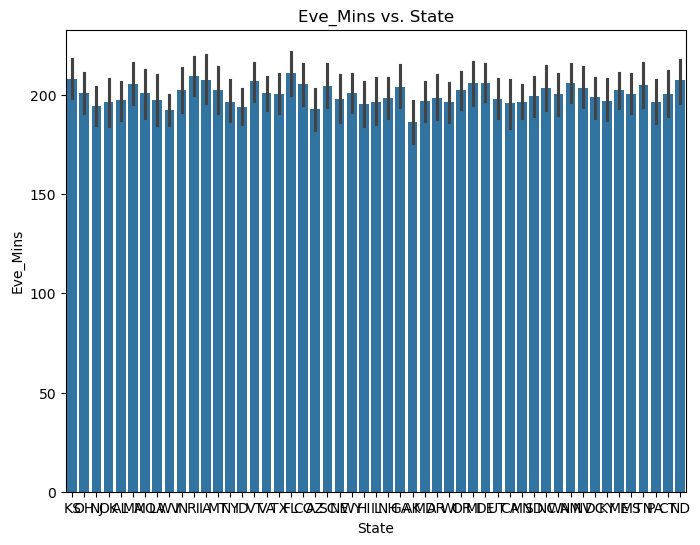

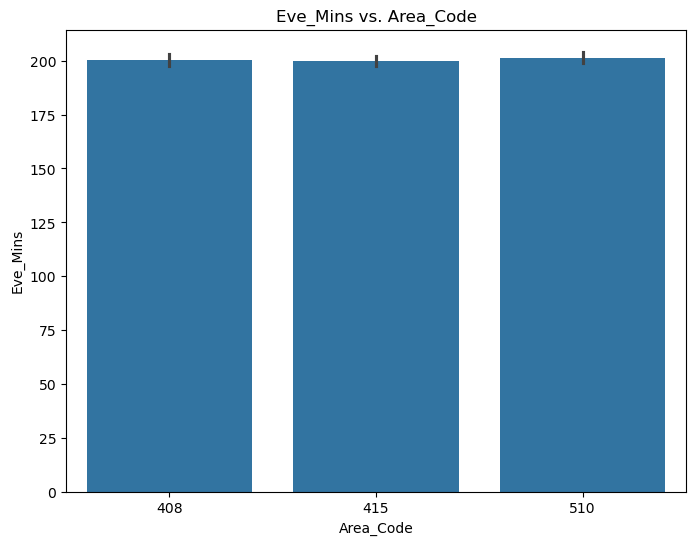

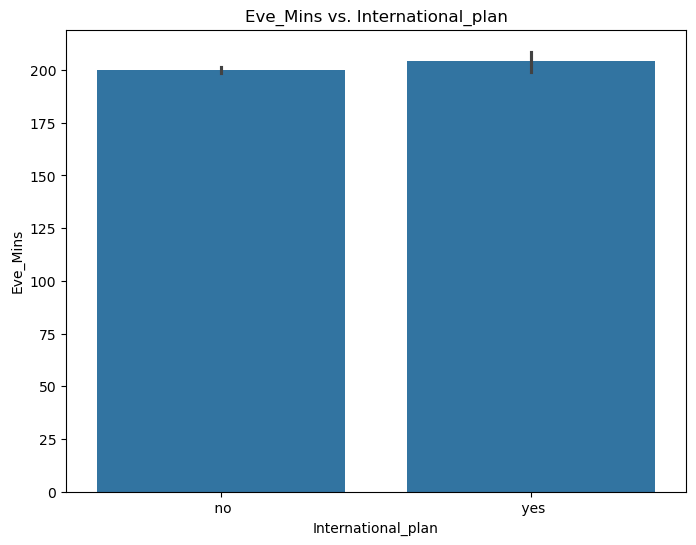

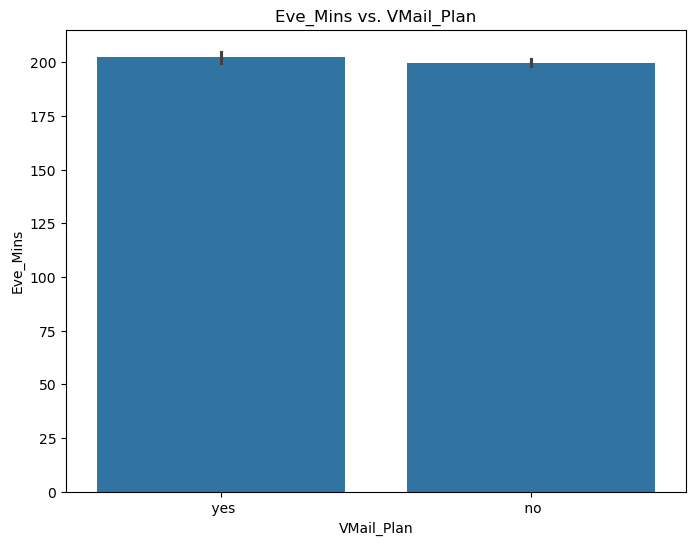

<Figure size 800x600 with 0 Axes>

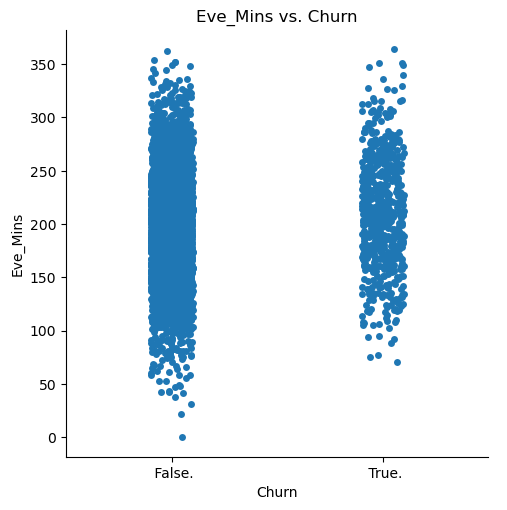

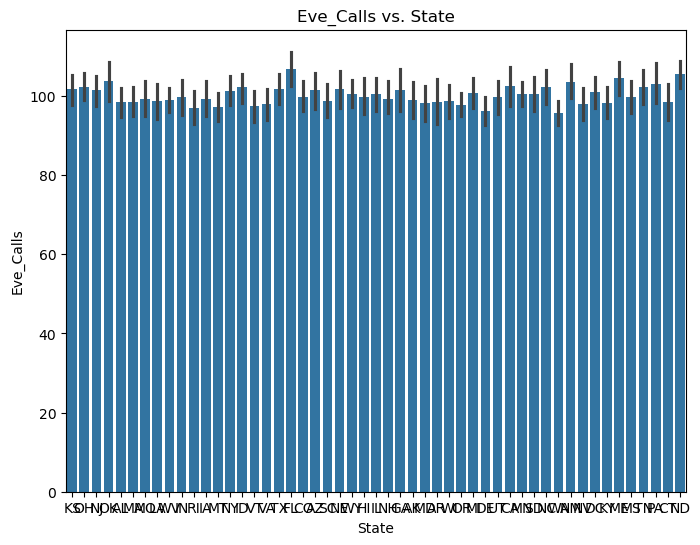

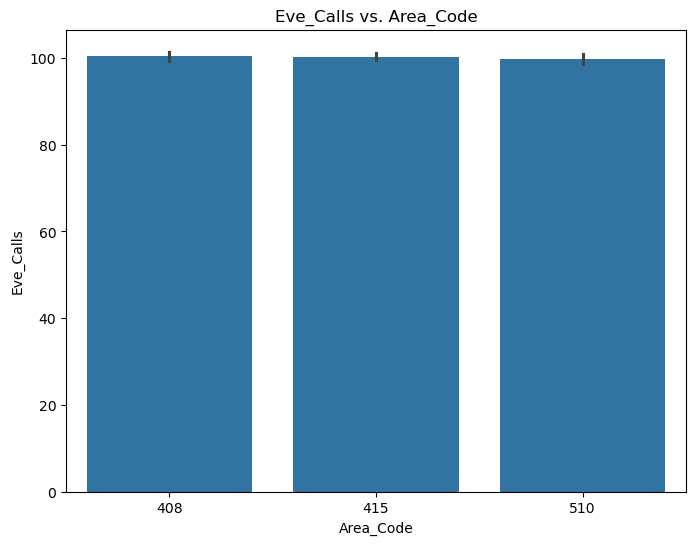

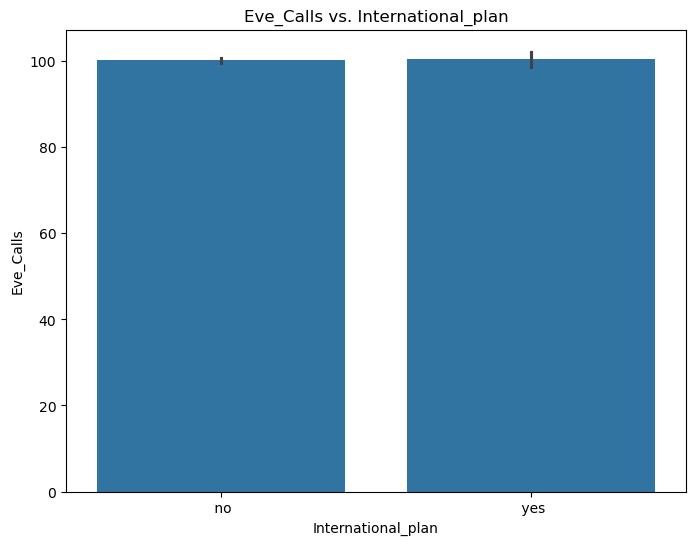

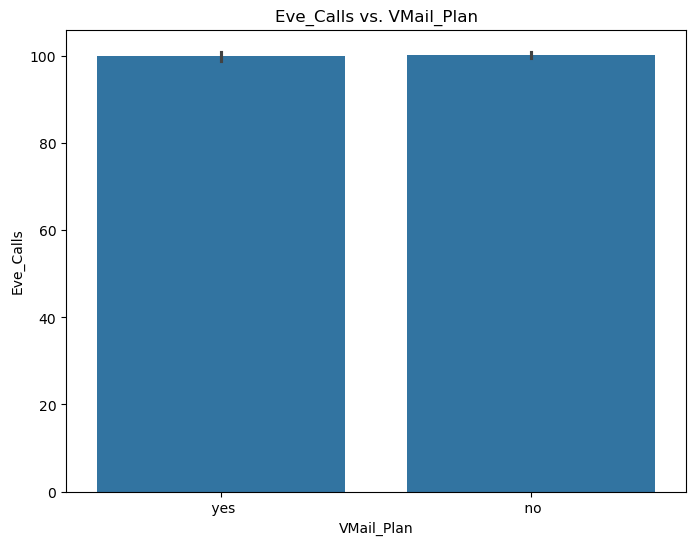

<Figure size 800x600 with 0 Axes>

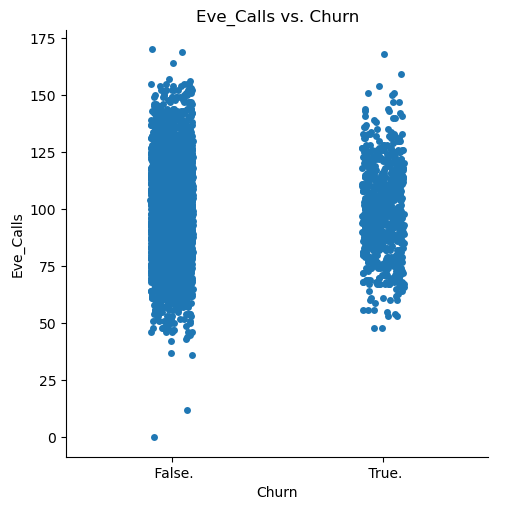

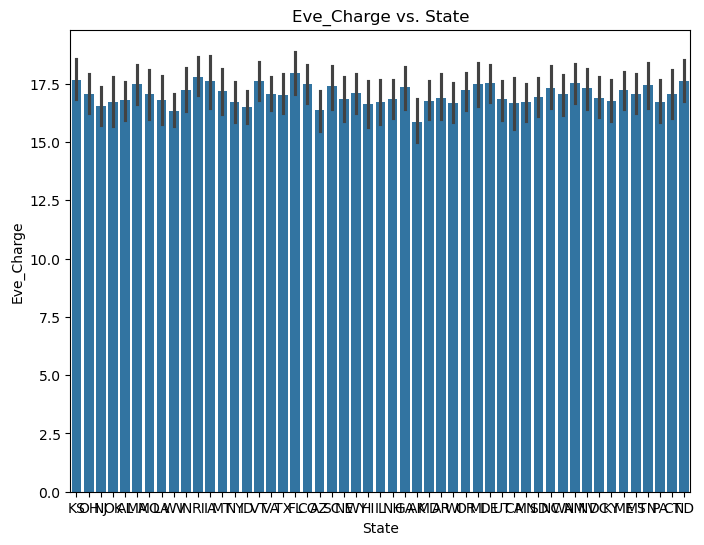

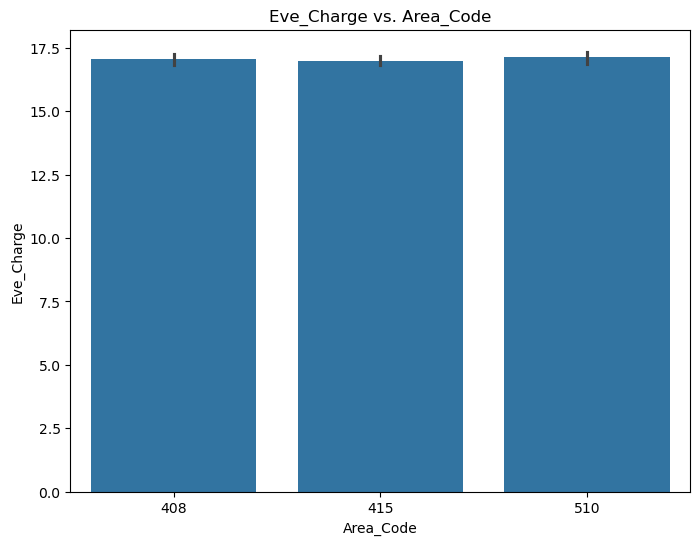

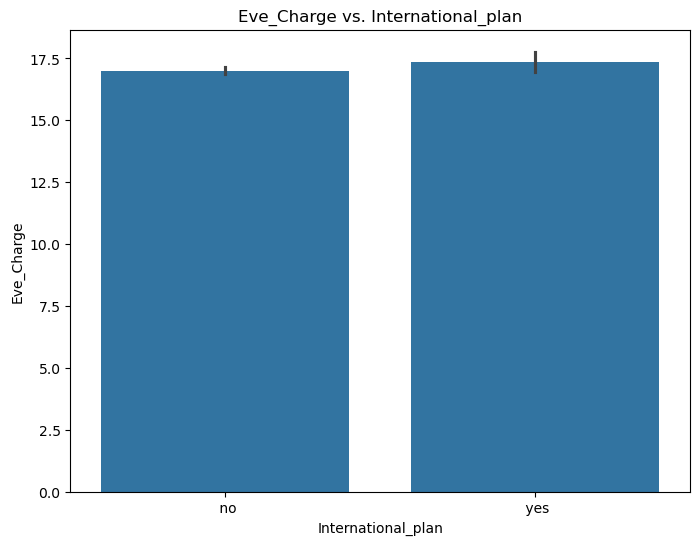

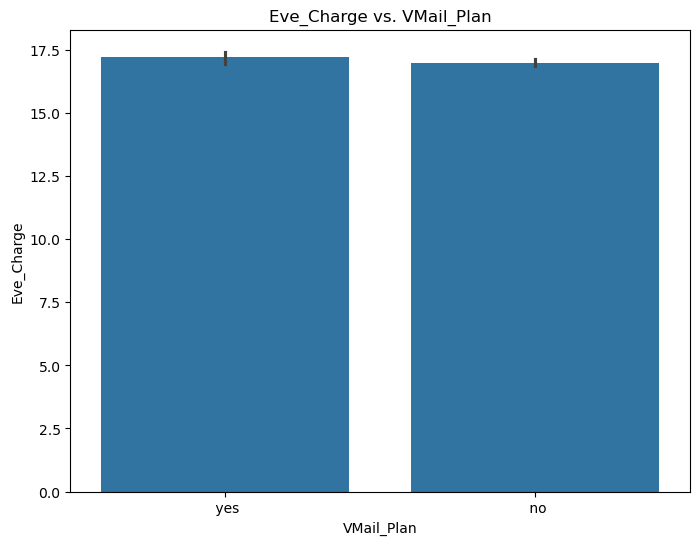

<Figure size 800x600 with 0 Axes>

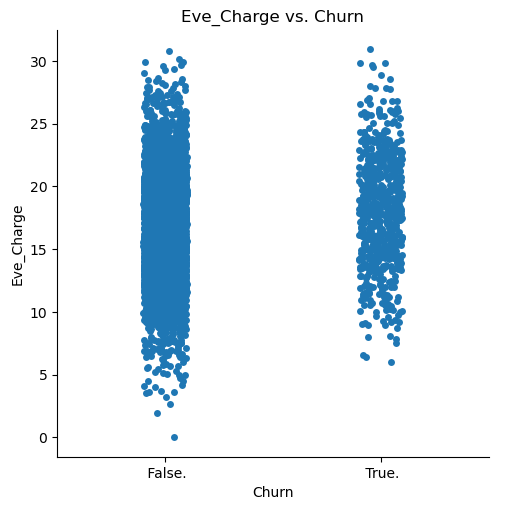

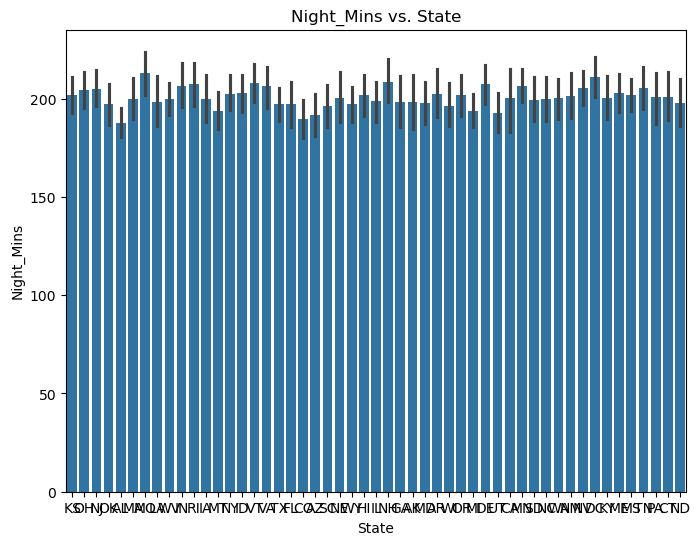

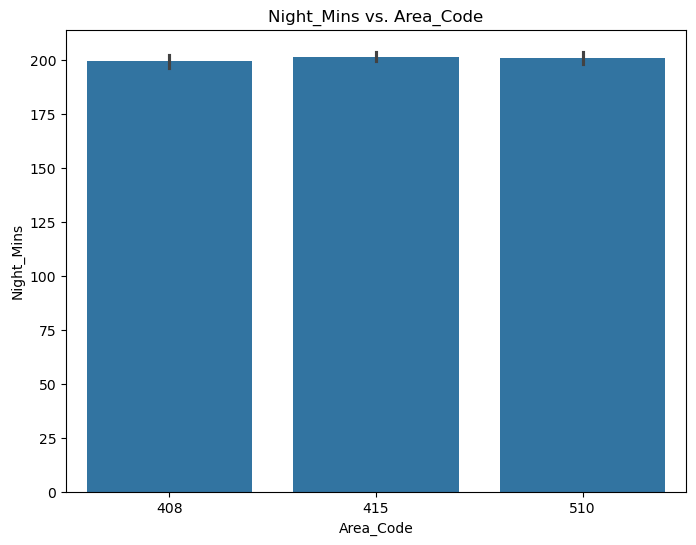

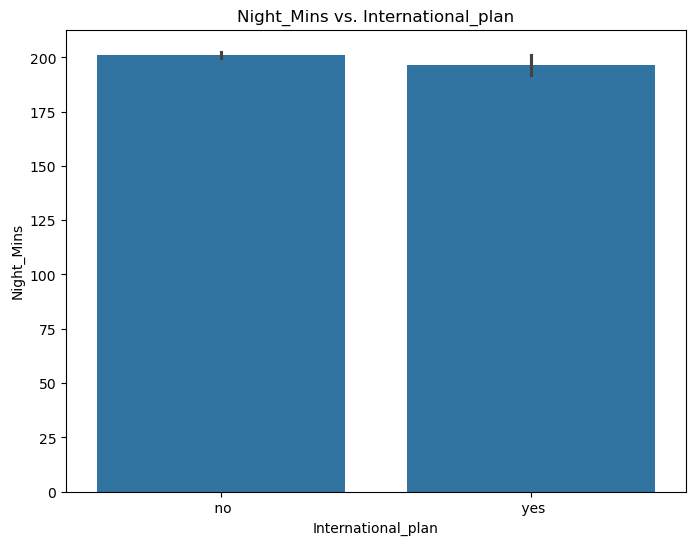

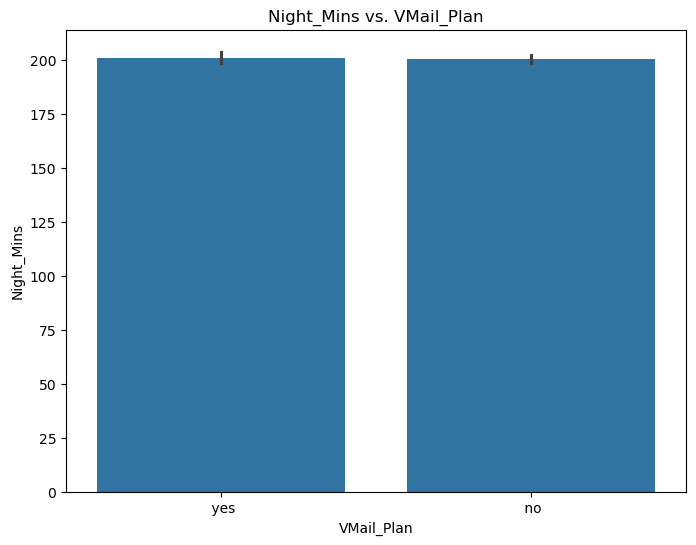

<Figure size 800x600 with 0 Axes>

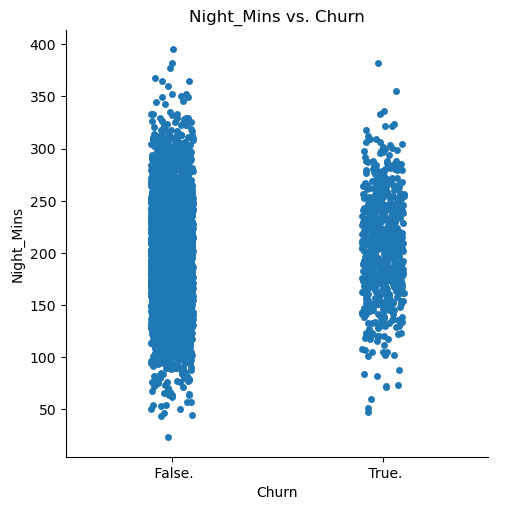

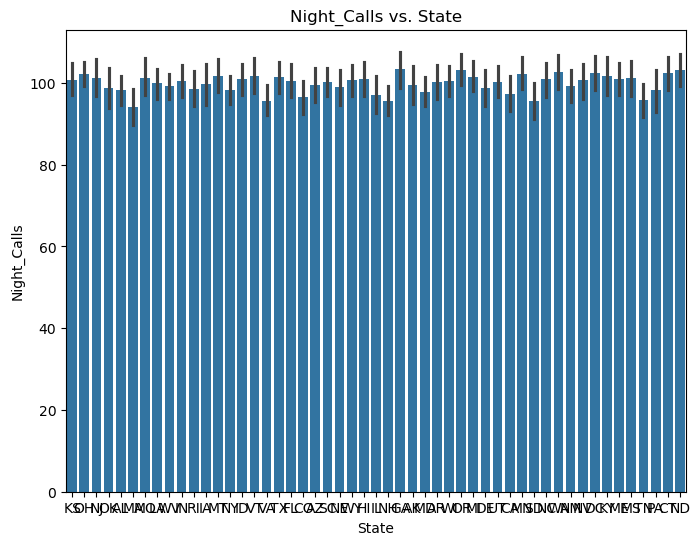

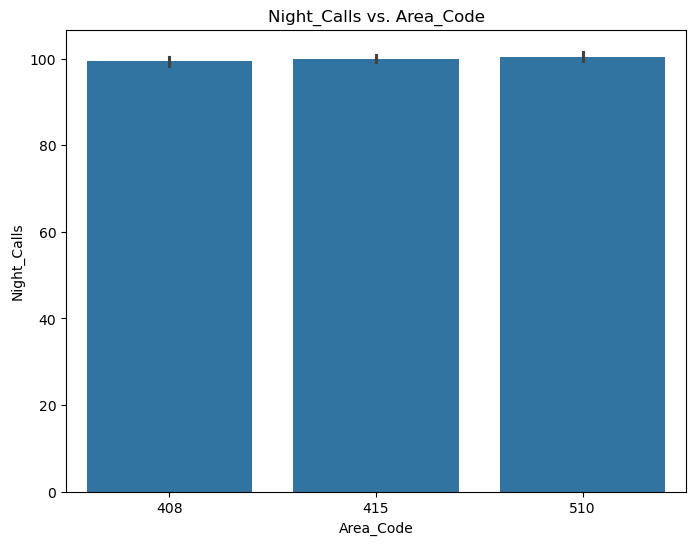

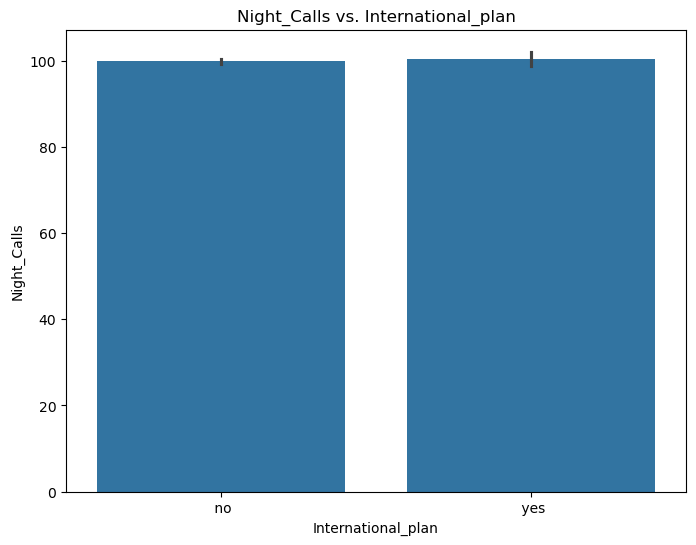

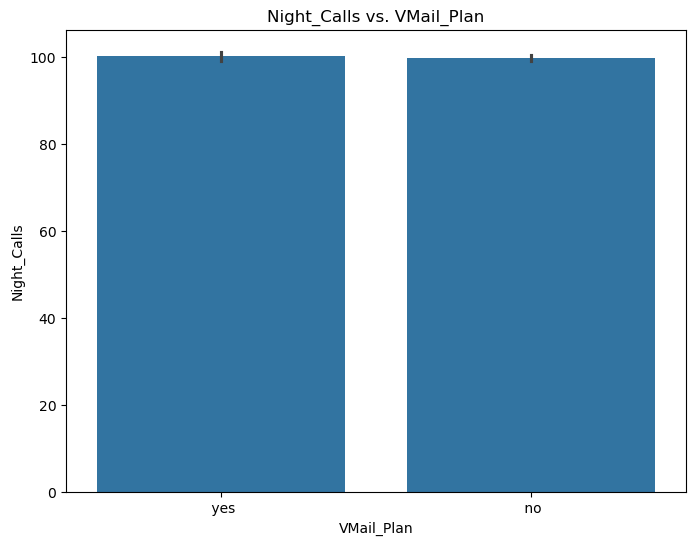

<Figure size 800x600 with 0 Axes>

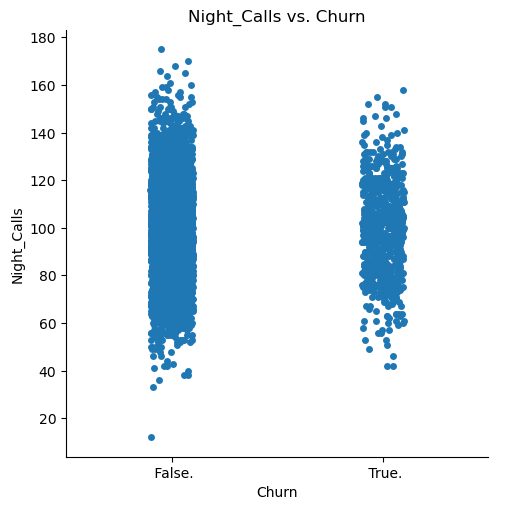

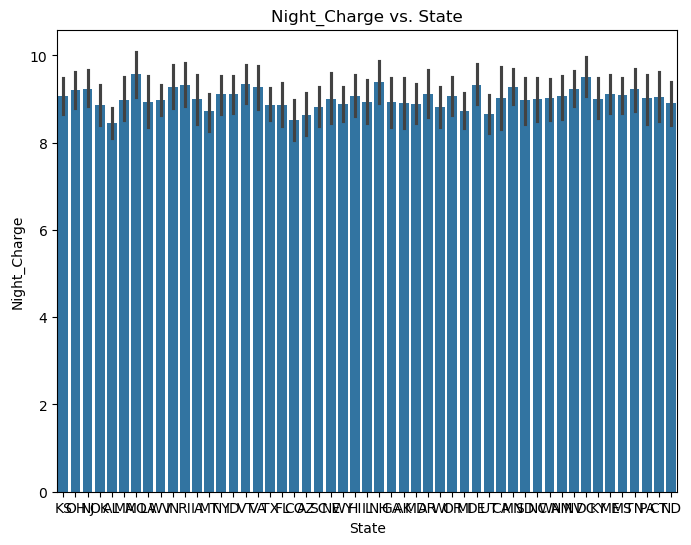

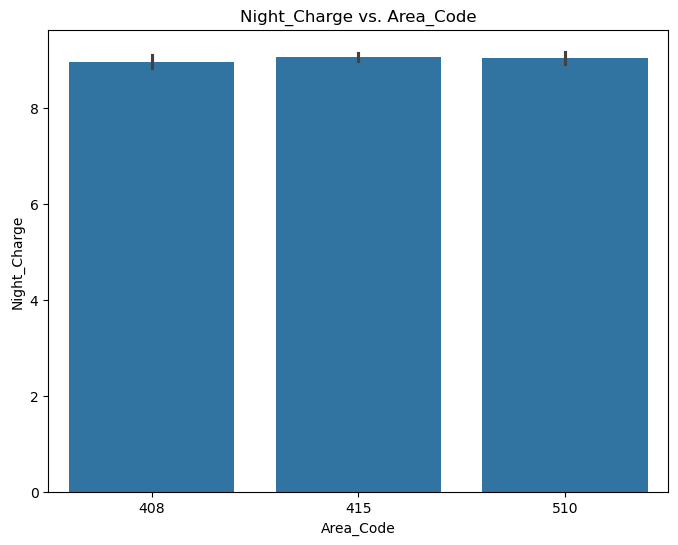

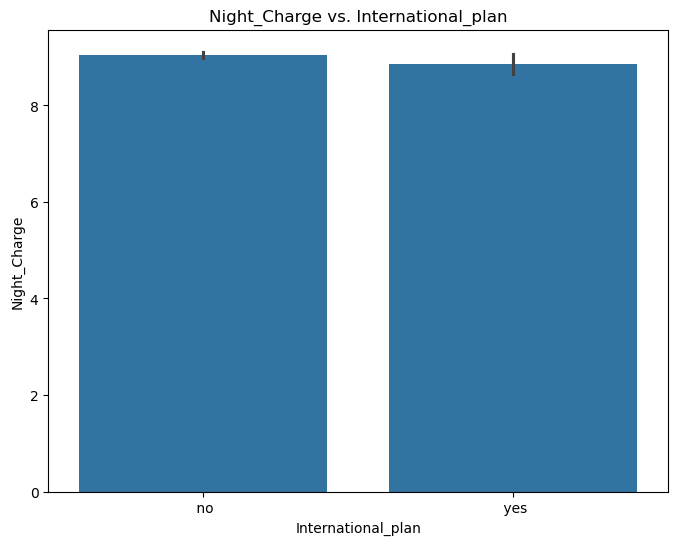

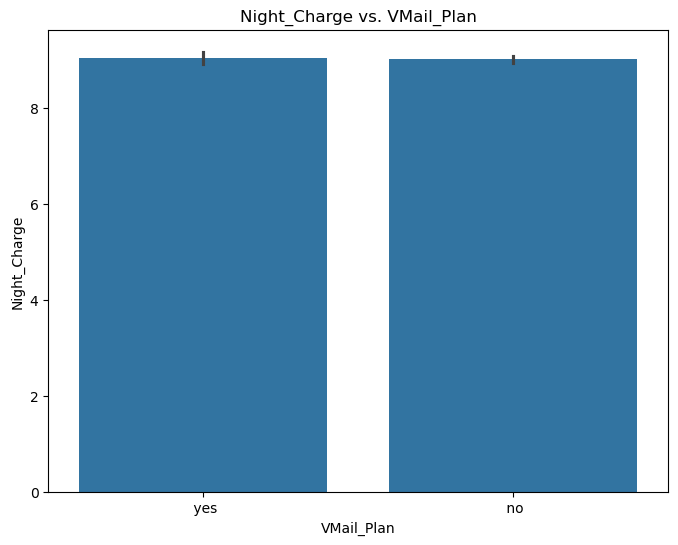

<Figure size 800x600 with 0 Axes>

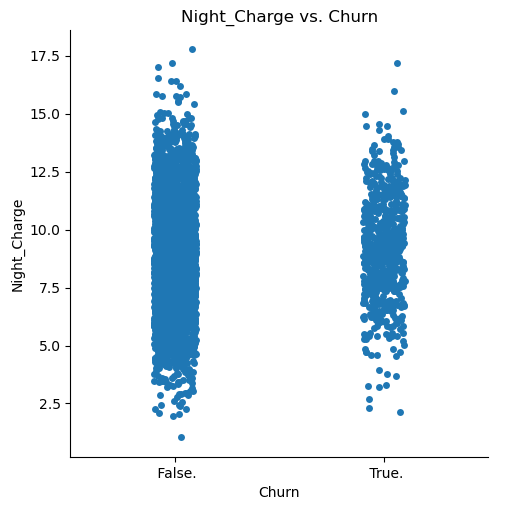

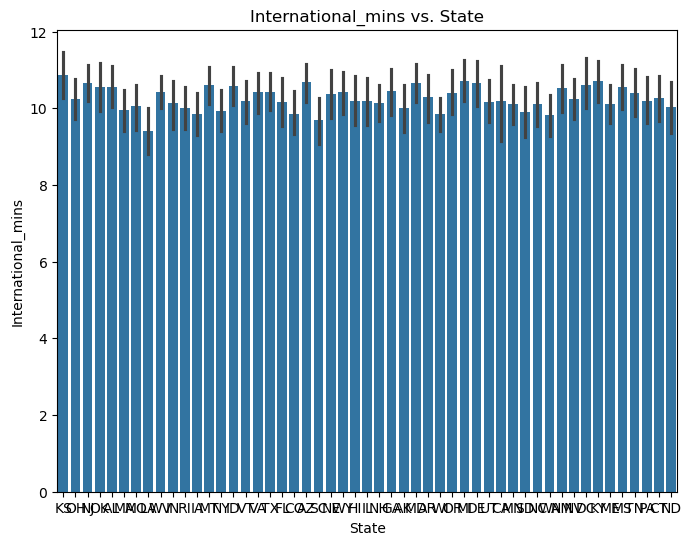

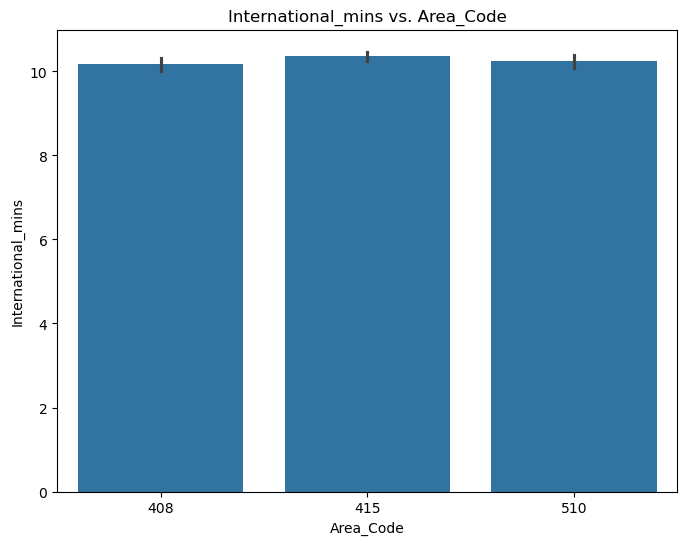

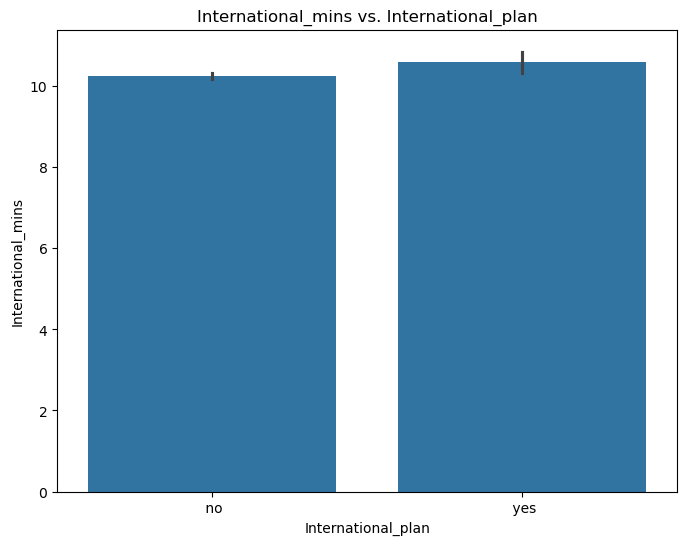

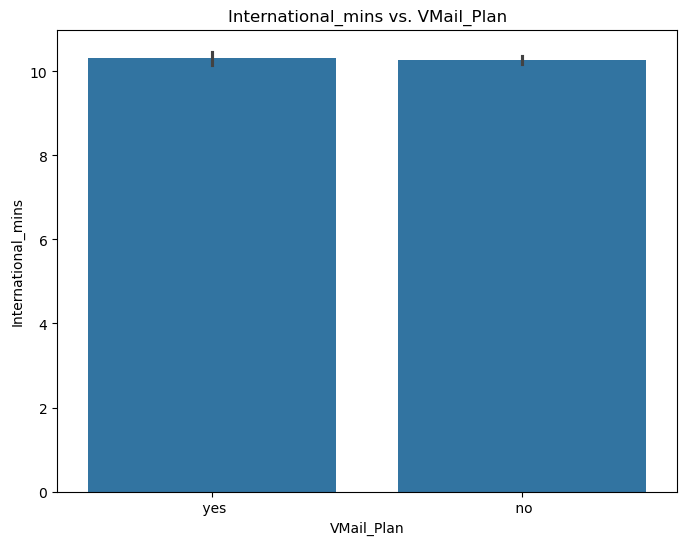

<Figure size 800x600 with 0 Axes>

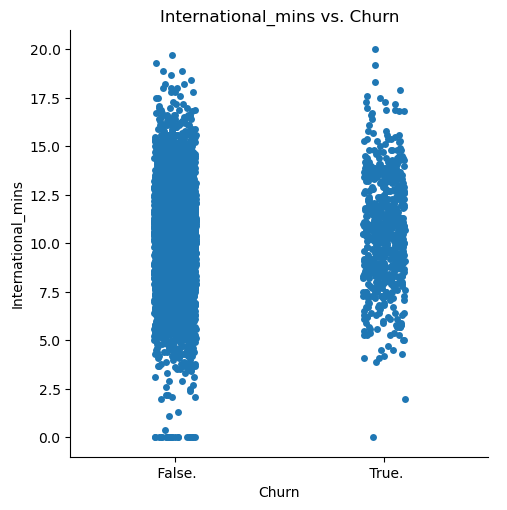

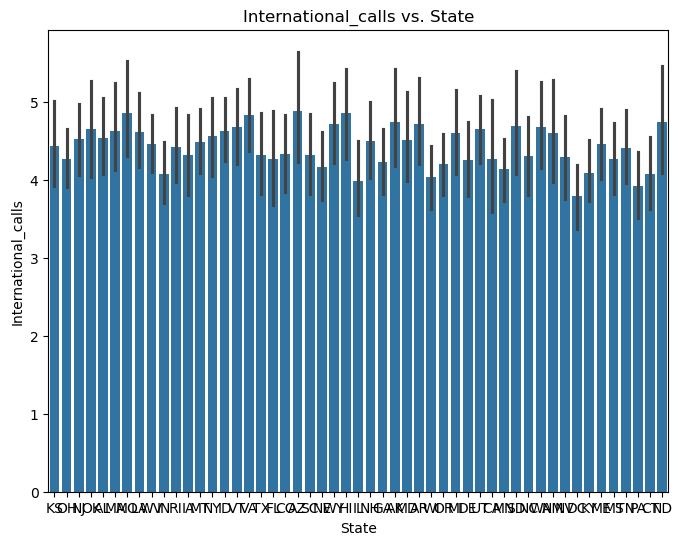

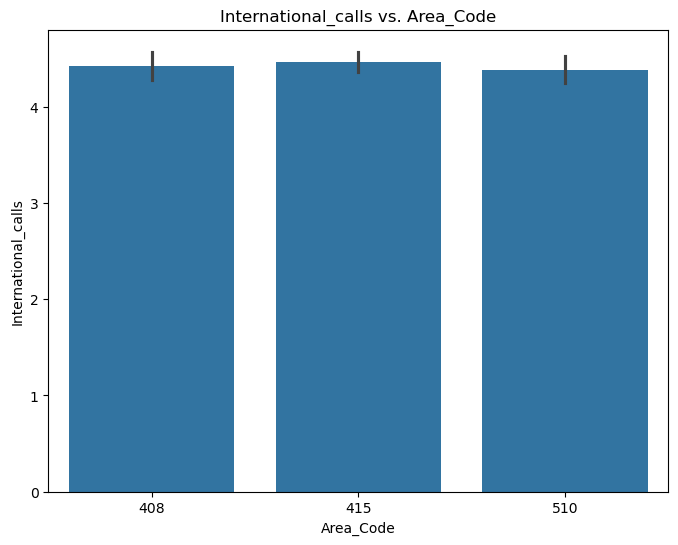

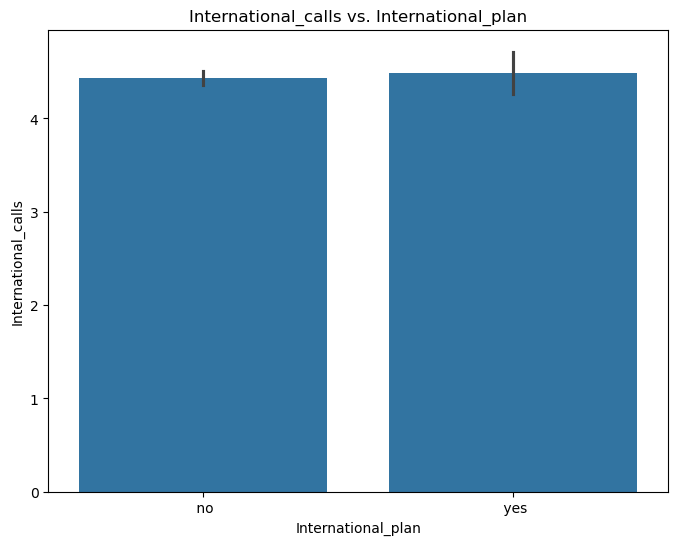

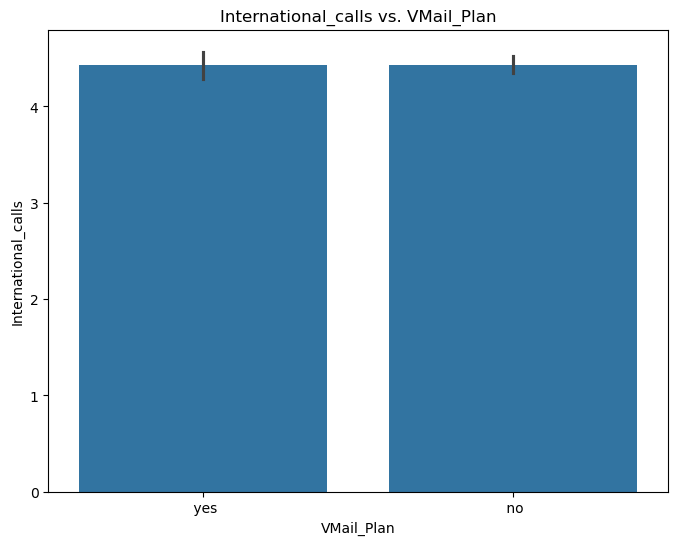

<Figure size 800x600 with 0 Axes>

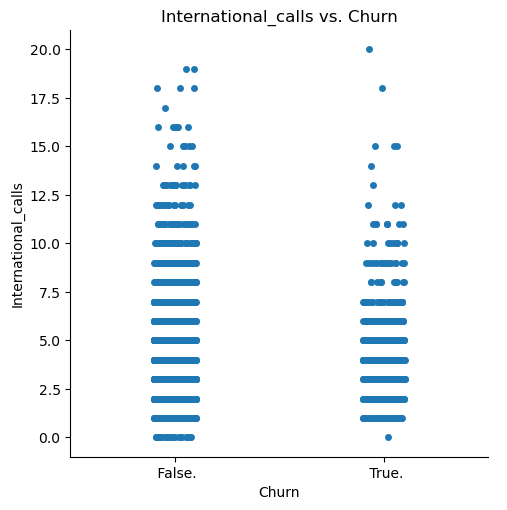

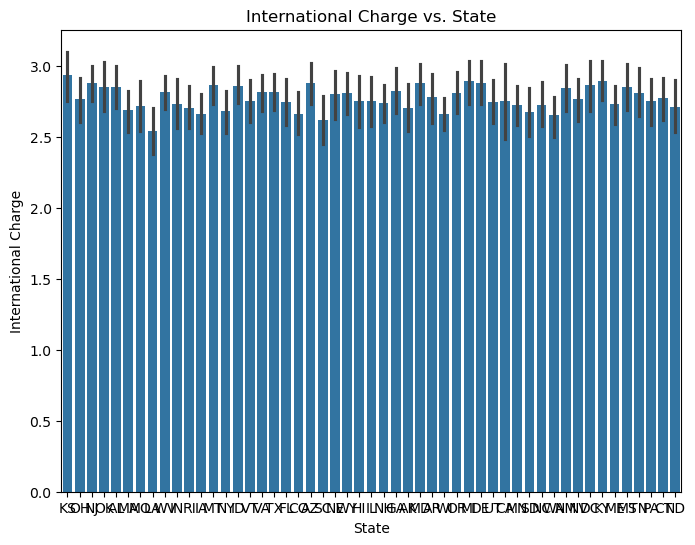

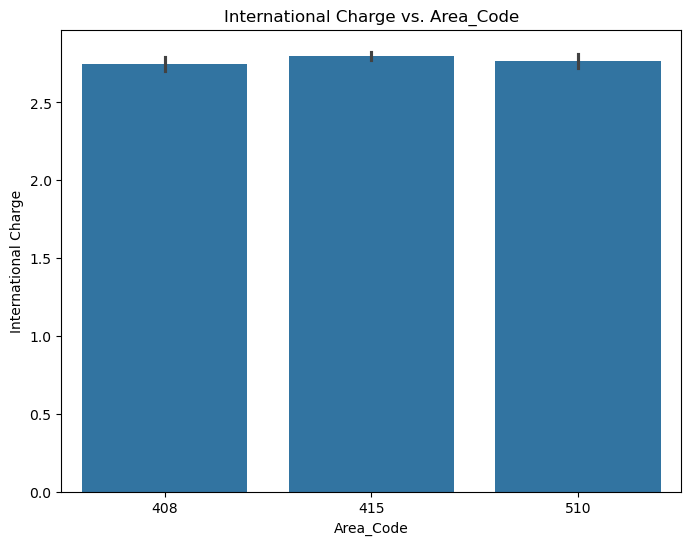

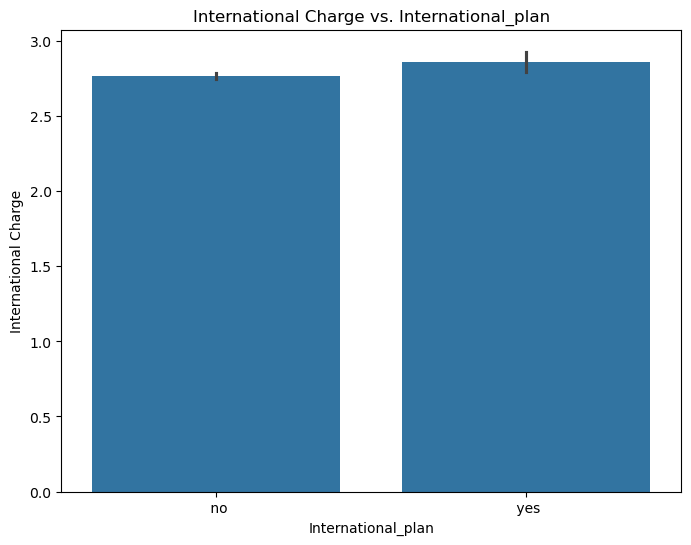

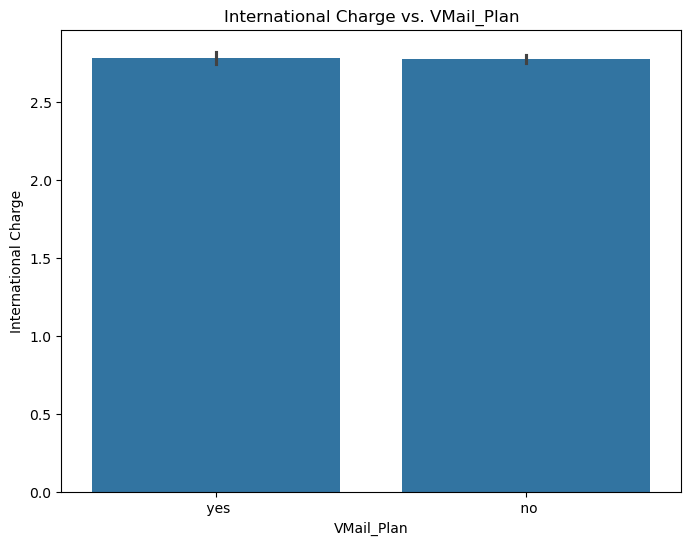

<Figure size 800x600 with 0 Axes>

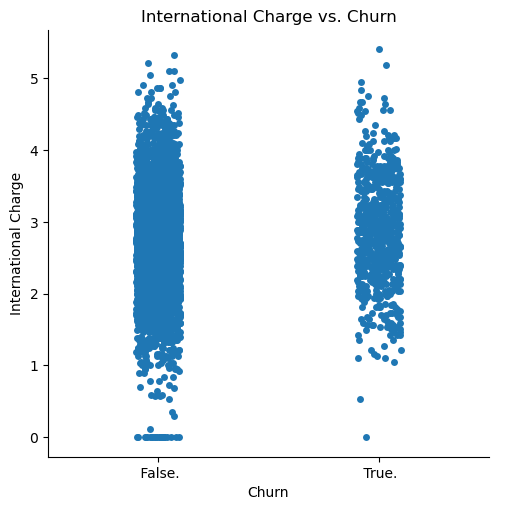

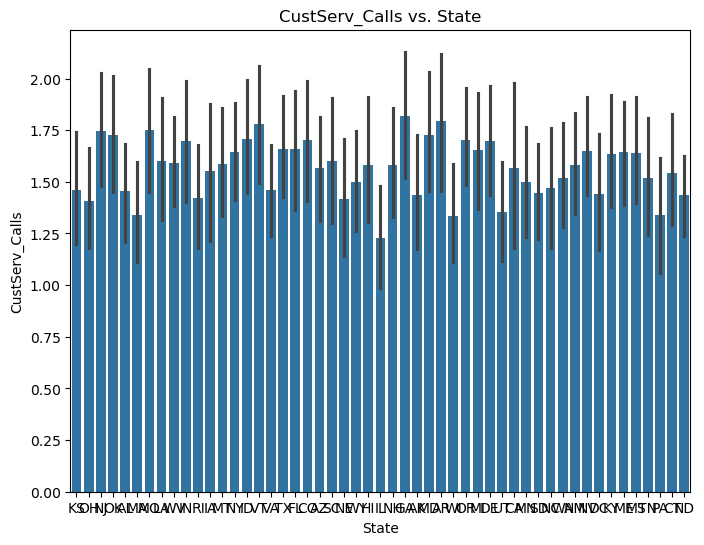

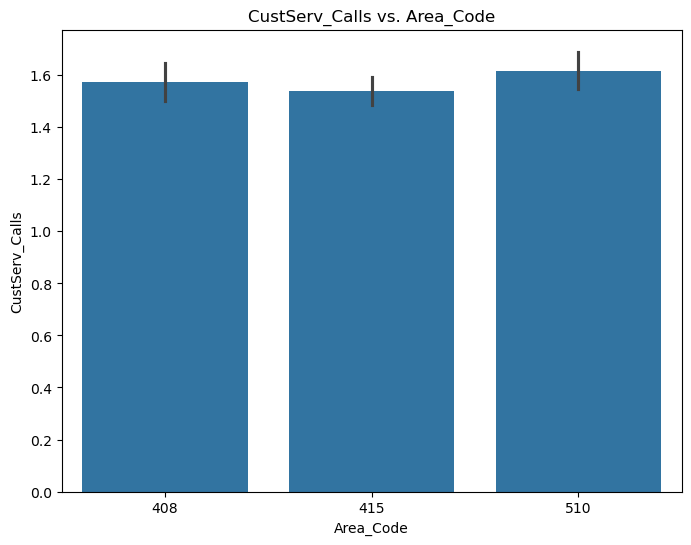

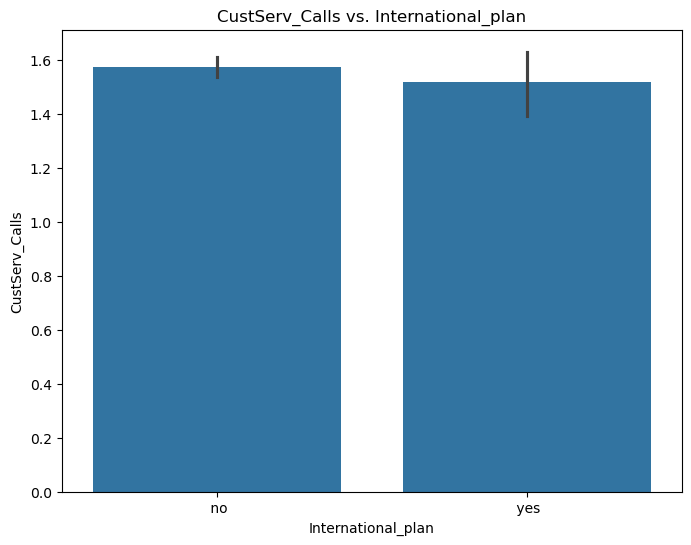

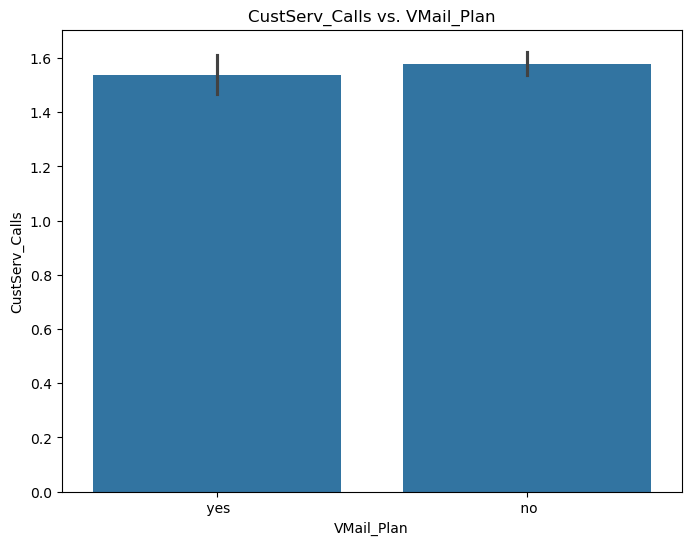

<Figure size 800x600 with 0 Axes>

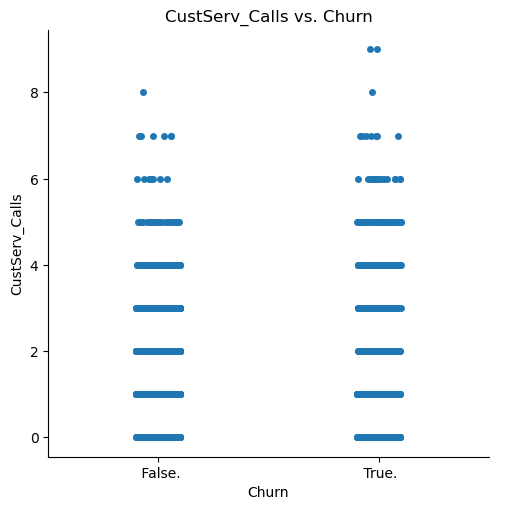

In [88]:
# Create a list of numerical and categorical variables
numerical_vars = ['Day_Mins', 'Day_Calls', 'Day_Charge',
                  'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
                  'Night_Charge', 'International_mins', 'International_calls', 'International Charge',
                  'CustServ_Calls']
categorical_vars = ['State', 'Area_Code', 'International_plan', 'VMail_Plan', 'Churn']

# Loop through numerical variables for bivariate analysis
for num_var in numerical_vars:
    for cat_var in categorical_vars:
        if num_var != cat_var:
            plt.figure(figsize=(8, 6))
            if cat_var == 'Churn':
                sns.catplot(x=cat_var, y=num_var, data=data)
                plt.title(f'{num_var} vs. {cat_var}')
            else:
                sns.barplot(x=cat_var, y=num_var, data=data)
                plt.title(f'{num_var} vs. {cat_var}')
            plt.show()

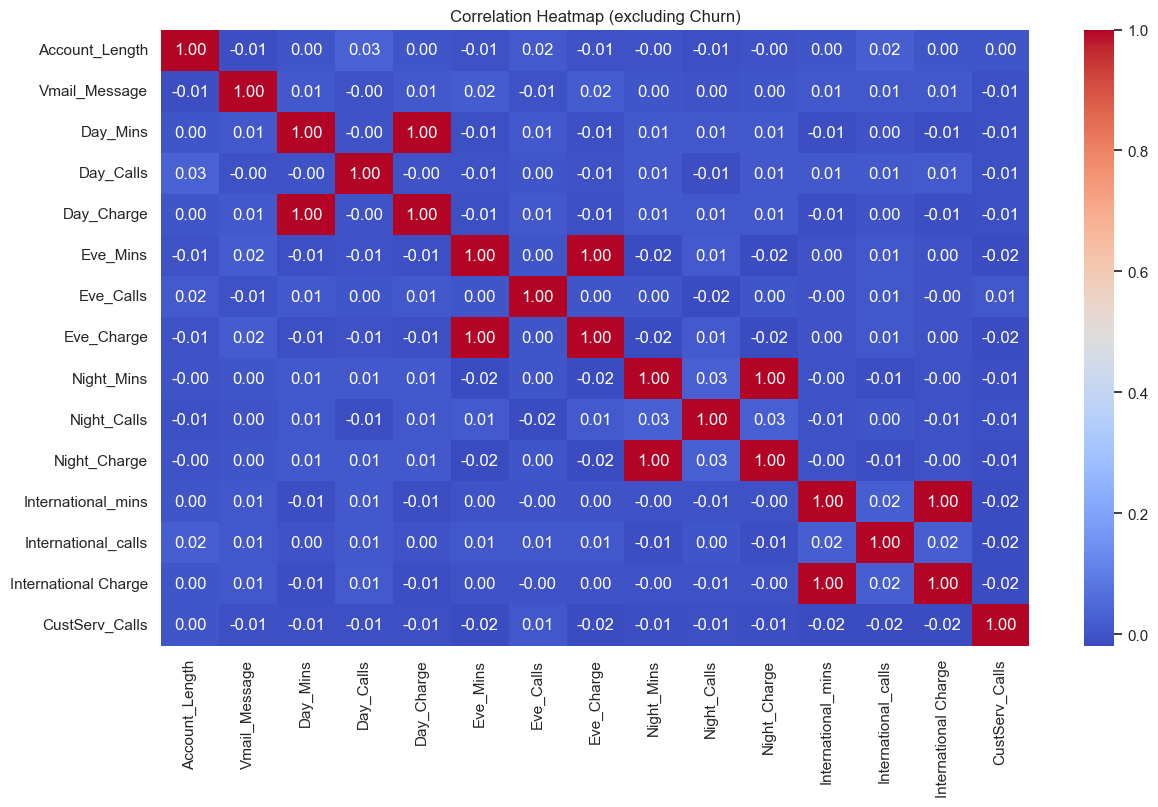

In [90]:
#Feature Selection
# Select relevant features (excluding the target variable 'Churn')
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
            'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
            'Night_Charge', 'International_mins', 'International_calls', 'International Charge',
            'CustServ_Calls']

# Calculate correlation coefficients
correlation_matrix = data[features].corr()

# Sort features based on their correlation with each other
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap (excluding Churn)')
plt.show()

Handling Outliers:


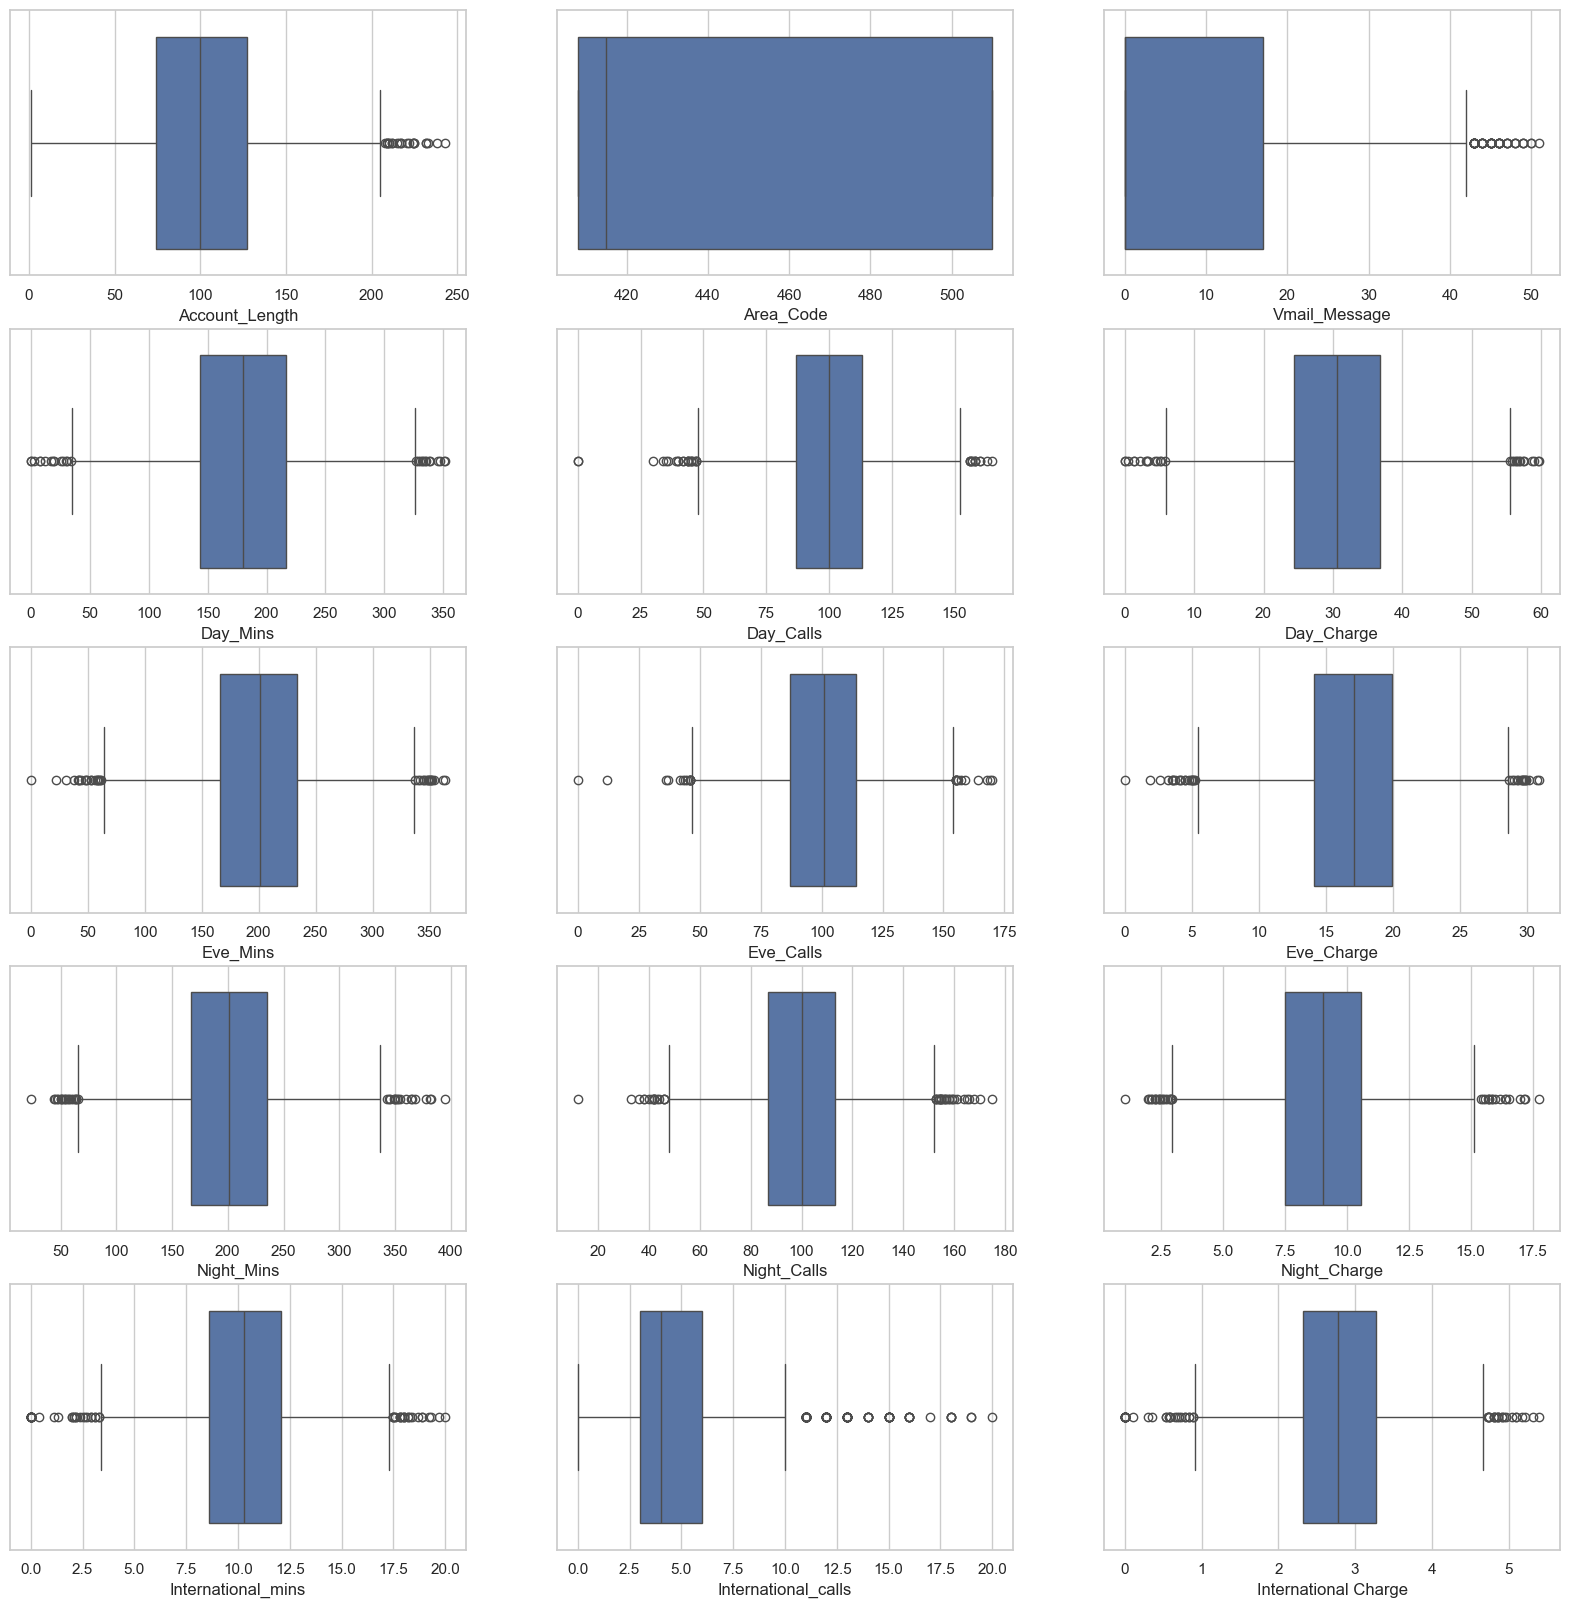

In [93]:
plt.figure(figsize=(20,20))
plot_num=1
for i in data.select_dtypes(include=['float64','int64']):
    if plot_num<=15:
        plt.subplot(5,3,plot_num)
        sns.boxplot(x=data[i])
    plot_num+=1

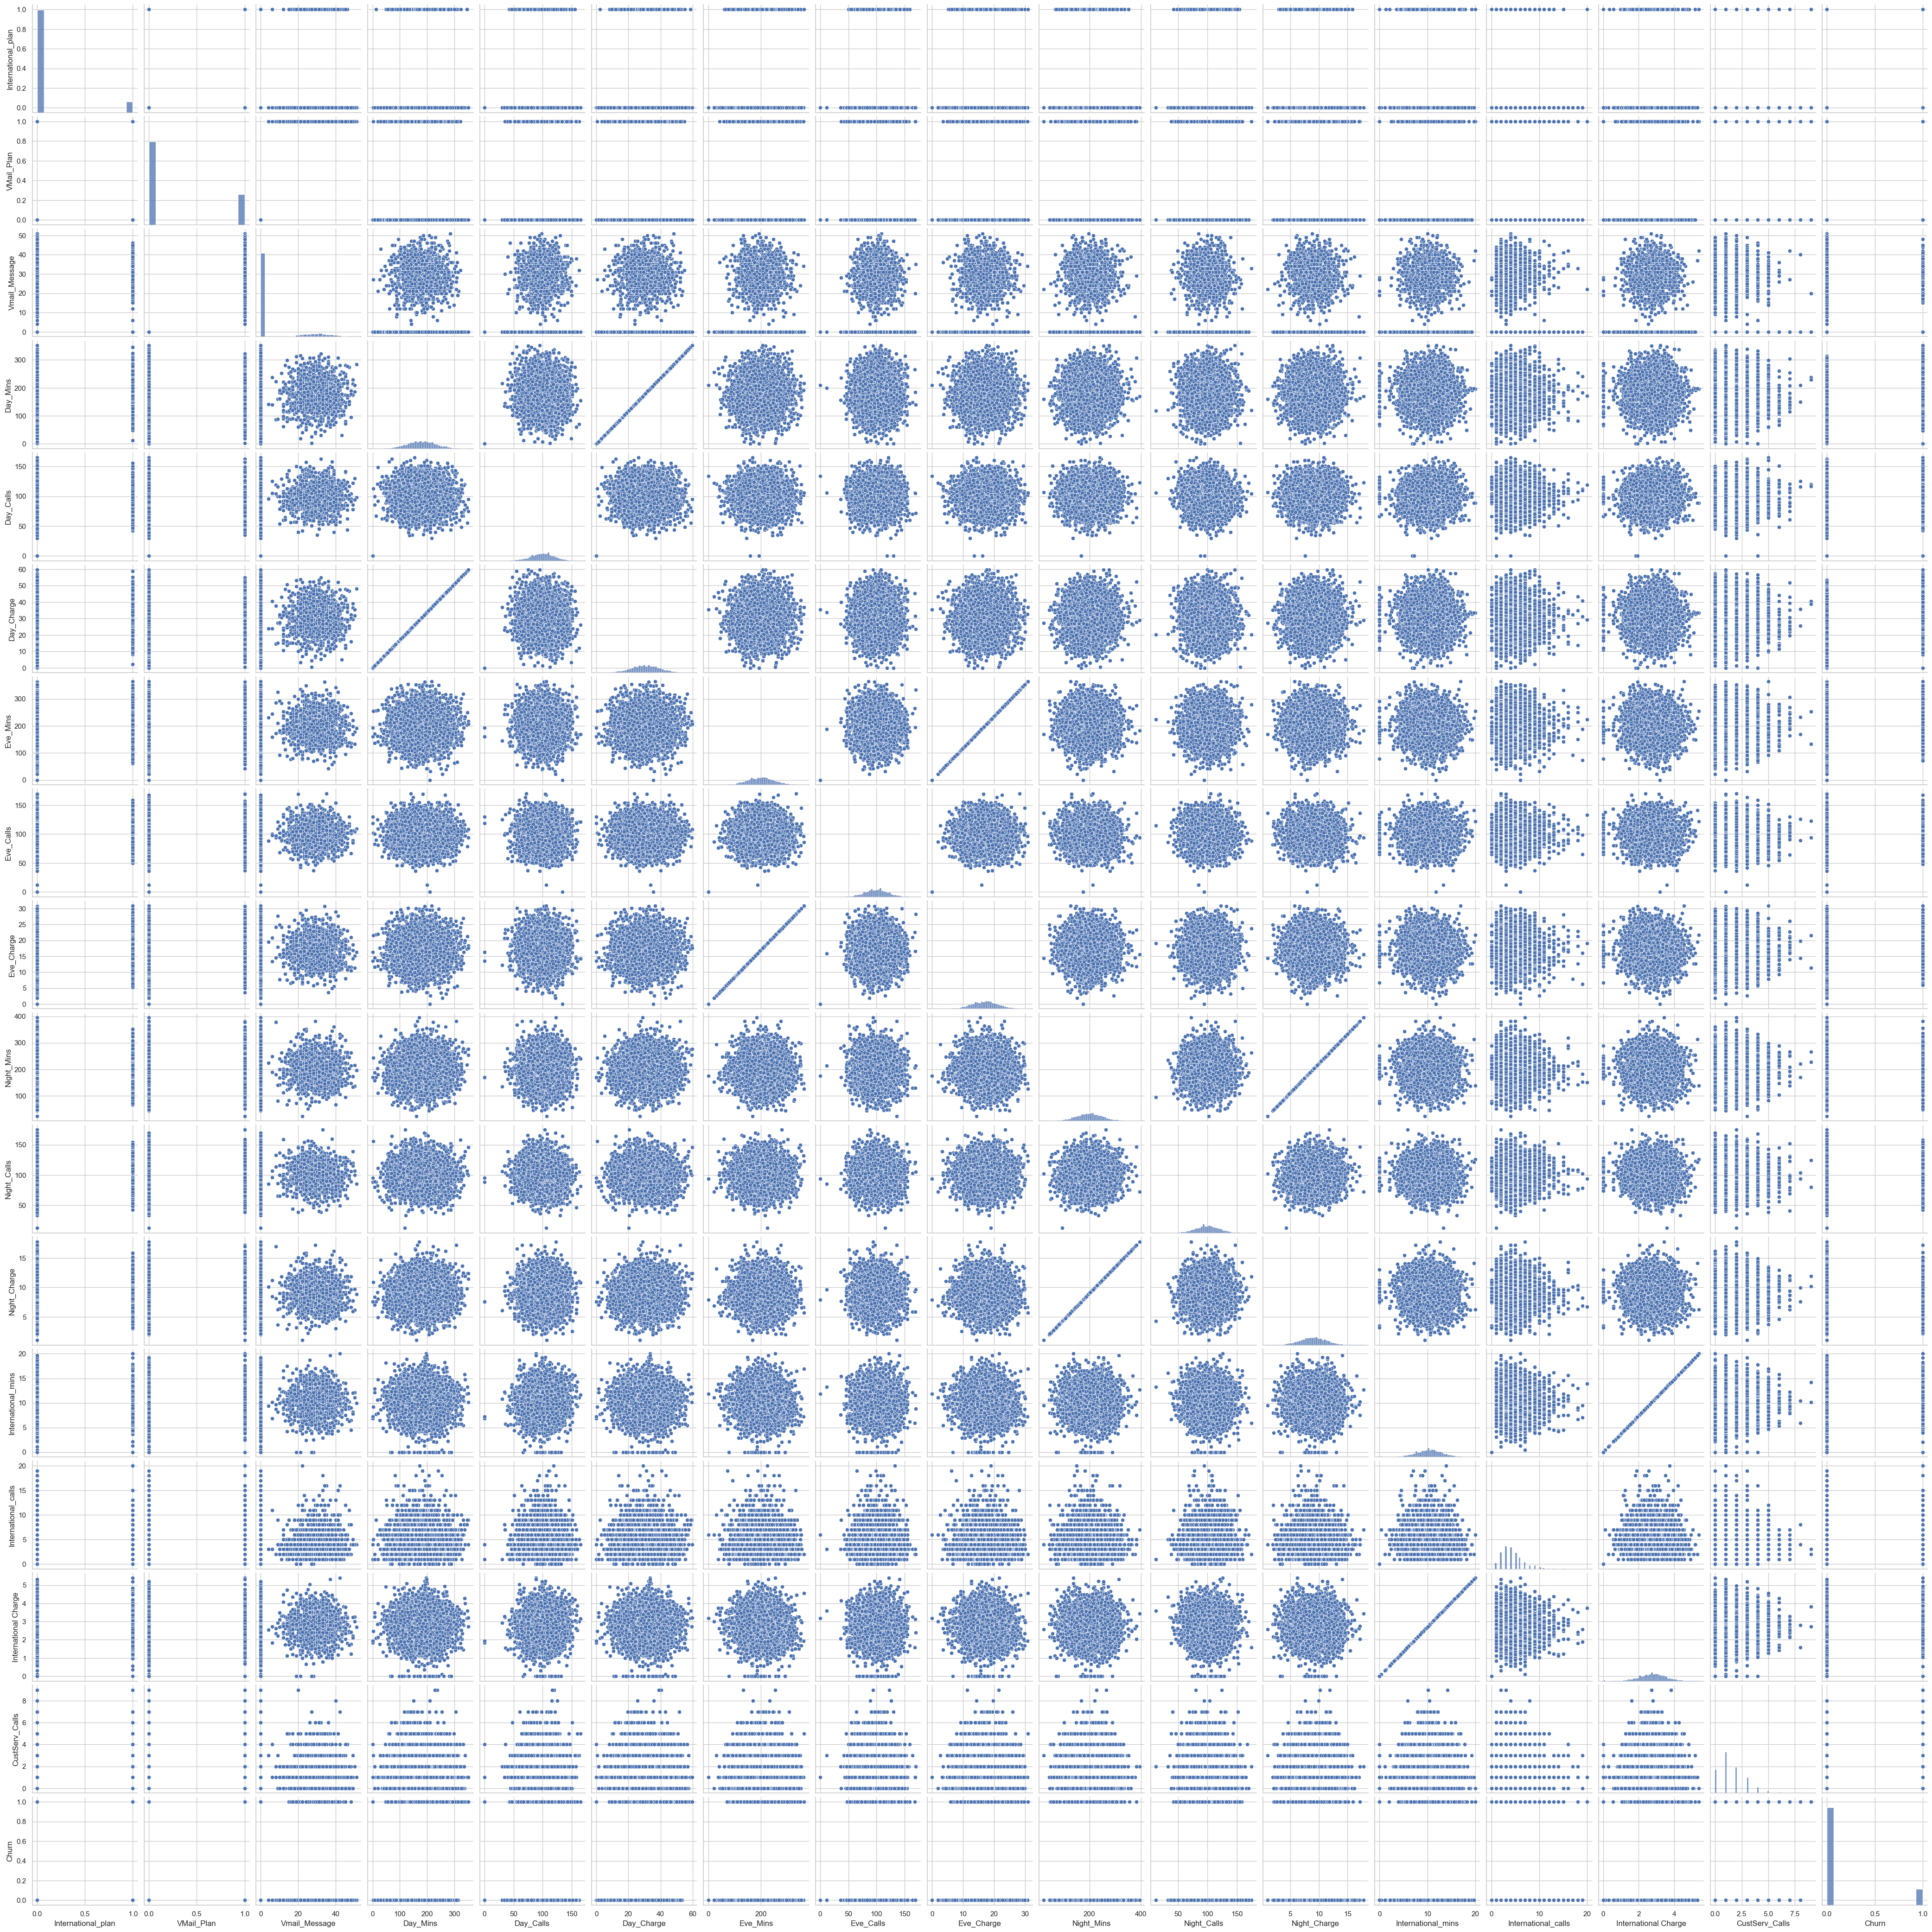

In [125]:
sns.pairplot(data)
plt.show()

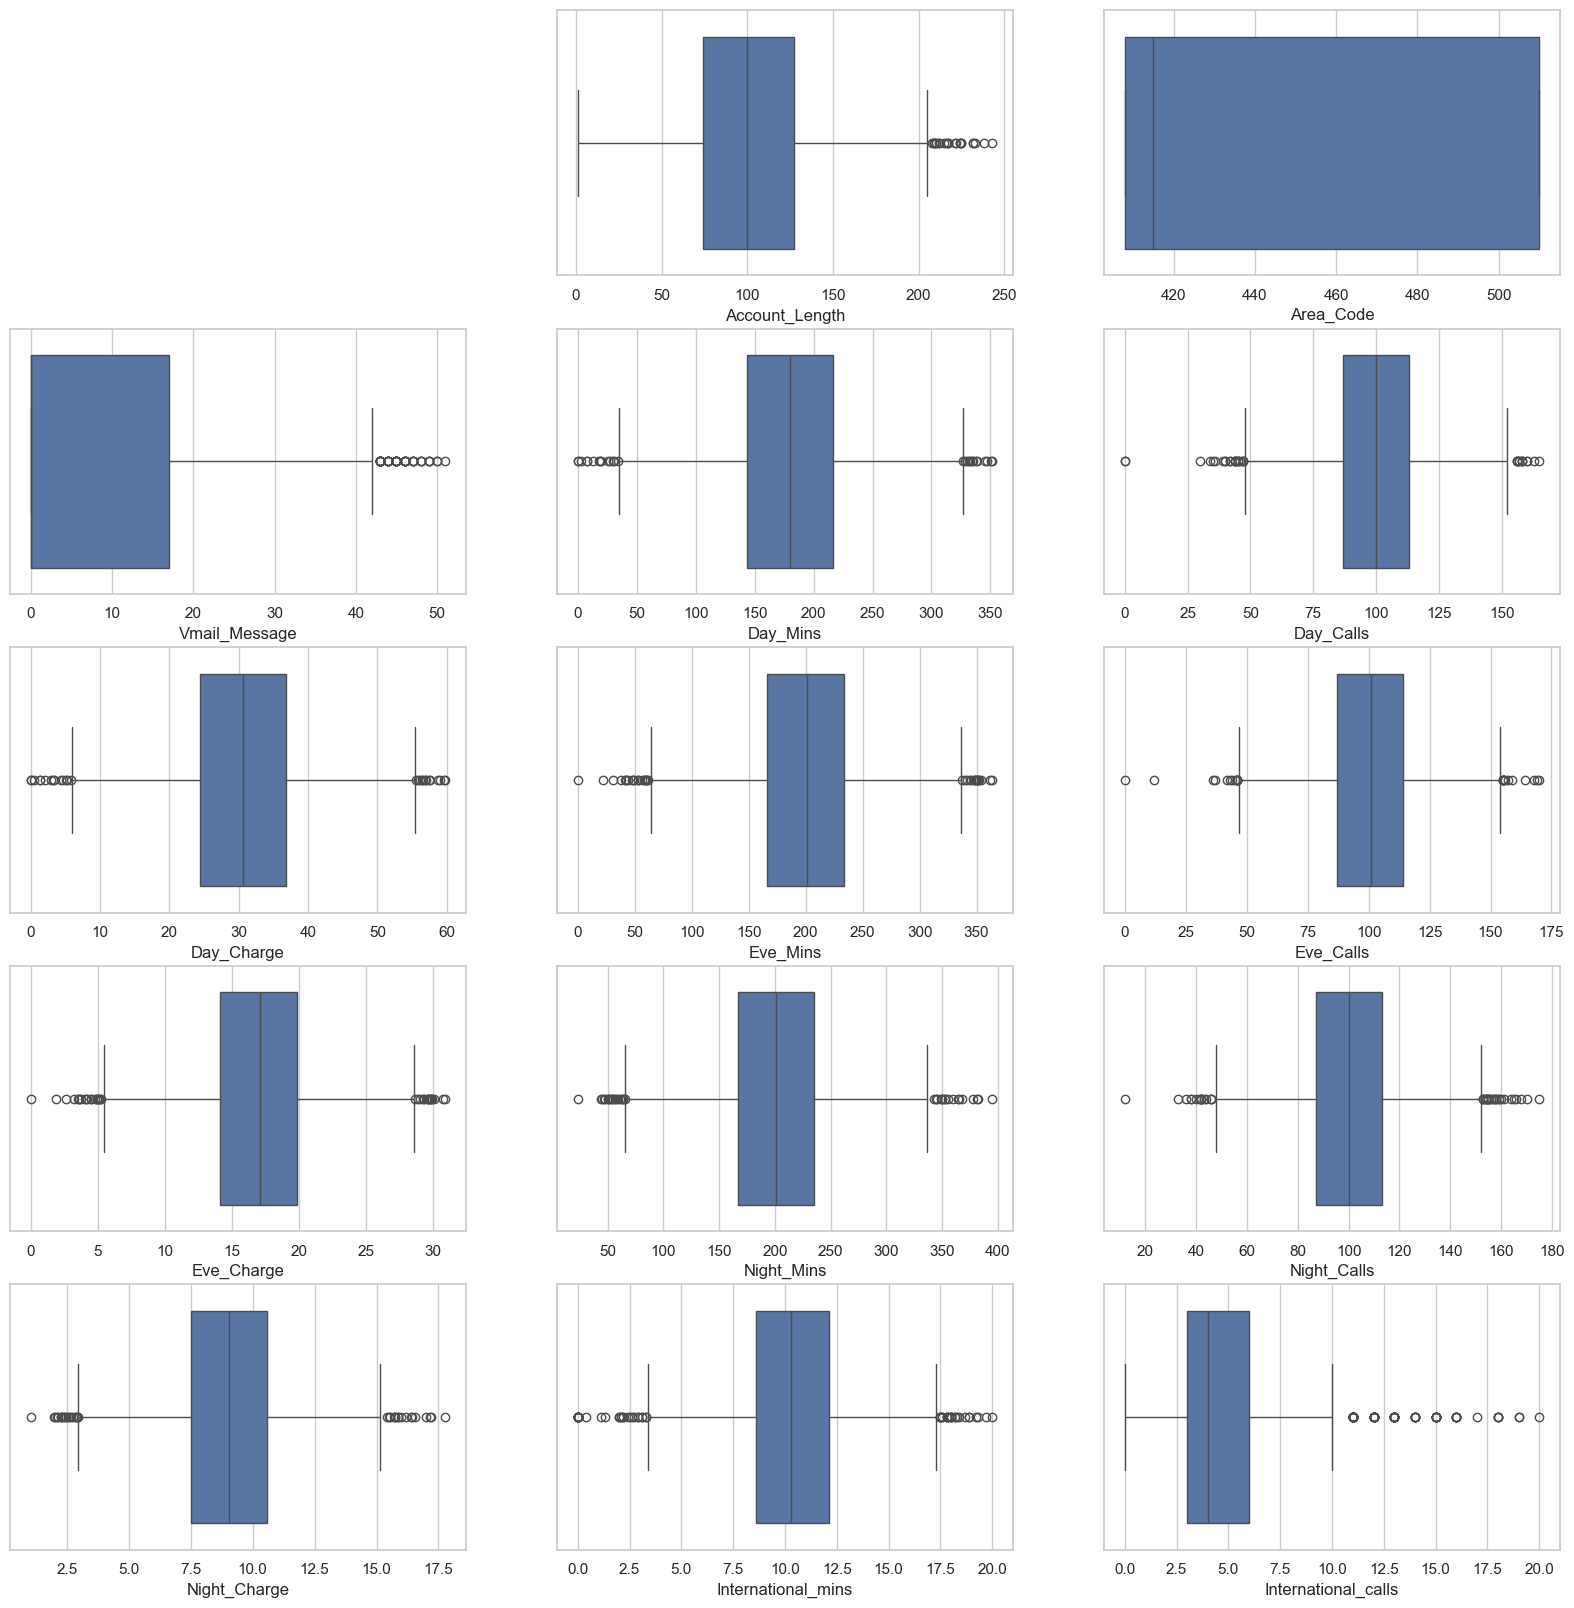

In [95]:
plt.figure(figsize=(20,20))
plot_num=2
for i in data.select_dtypes(include=['float64','int64']):
    if plot_num<=15:
        plt.subplot(5,3,plot_num)
        sns.boxplot(x=data[i])
    plot_num+=1

Drop Unwanted Columns

In [98]:
data.drop(['Phone','State','Account_Length','Area_Code'],axis=1,inplace=True)

In [100]:
data

International_plan VMail_Plan  Vmail_Message  Day_Mins  Day_Calls  \
0                    no        yes             25     265.1        110   
1                    no        yes             26     161.6        123   
2                    no         no              0     243.4        114   
3                   yes         no              0     299.4         71   
4                   yes         no              0     166.7        113   
...                 ...        ...            ...       ...        ...   
4612                 no        yes             25     144.0         81   
4613                 no        yes             29     189.0         91   
4614                 no        yes             33     127.5        126   
4615                 no        yes             23     168.9         98   
4616                 no         no              0     204.7        100   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_mins  International_calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International Charge  CustServ_Calls    Churn  
0                     2.70               1   False.  
1                     3.70               1   False.  
2                     3.29               0   False.  
3                     1.78               2   False.  
4                     2.73               3   False.  
...                    ...             ...      ...  
4612                  2.30               3   False.  
4613                  4.24               3   False.  
4614                  3.51               1   False.  
4615                  3.86               0   False.  
4616                  3.27               2   False.  

[4617 rows x 17 columns]

In [102]:
col=('International_plan','VMail_Plan','Vmail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_mins','International_calls','International Charge','CustServ_Calls','Churn')
col

('International_plan',
 'VMail_Plan',
 'Vmail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'International_mins',
 'International_calls',
 'International Charge',
 'CustServ_Calls',
 'Churn')

In [104]:
for column in col:
    if data[column].dtype=='object':
        data[column].fillna(data[column].mode(),inplace=True)
    else:
        data[column].fillna(data[column].median(),inplace=True)
    data

In [106]:
col2=data.select_dtypes(include=['object']).columns
col2

Index(['International_plan', 'VMail_Plan', 'Churn'], dtype='object')

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col2:
    data[i]=le.fit_transform(data[i])
data

International_plan  VMail_Plan  Vmail_Message  Day_Mins  Day_Calls  \
0                      0           1             25     265.1        110   
1                      0           1             26     161.6        123   
2                      0           0              0     243.4        114   
3                      1           0              0     299.4         71   
4                      1           0              0     166.7        113   
...                  ...         ...            ...       ...        ...   
4612                   0           1             25     144.0         81   
4613                   0           1             29     189.0         91   
4614                   0           1             33     127.5        126   
4615                   0           1             23     168.9         98   
4616                   0           0              0     204.7        100   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_mins  International_calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International Charge  CustServ_Calls  Churn  
0                     2.70               1      0  
1                     3.70               1      0  
2                     3.29               0      0  
3                     1.78               2      0  
4                     2.73               3      0  
...                    ...             ...    ...  
4612                  2.30               3      0  
4613                  4.24               3      0  
4614                  3.51               1      0  
4615                  3.86               0      0  
4616                  3.27               2      0  

[4617 rows x 17 columns]

In [110]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
scaled_values=ms.fit_transform(data.iloc[:,:-1])
X=pd.DataFrame(scaled_values,columns=data.columns[:-1])
X

International_plan  VMail_Plan  Vmail_Message  Day_Mins  Day_Calls  \
0                    0.0         1.0       0.490196  0.754196   0.666667   
1                    0.0         1.0       0.509804  0.459744   0.745455   
2                    0.0         0.0       0.000000  0.692461   0.690909   
3                    1.0         0.0       0.000000  0.851778   0.430303   
4                    1.0         0.0       0.000000  0.474253   0.684848   
...                  ...         ...            ...       ...        ...   
4612                 0.0         1.0       0.490196  0.409673   0.490909   
4613                 0.0         1.0       0.568627  0.537696   0.551515   
4614                 0.0         1.0       0.647059  0.362731   0.763636   
4615                 0.0         1.0       0.450980  0.480512   0.593939   
4616                 0.0         0.0       0.000000  0.582361   0.606061   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0       0.754183  0.542755   0.582353    0.542866    0.595750     0.484663   
1       0.459672  0.537531   0.605882    0.537690    0.621840     0.558282   
2       0.692436  0.333242   0.647059    0.333225    0.374933     0.564417   
3       0.851740  0.170195   0.517647    0.170171    0.467187     0.472393   
4       0.474230  0.407754   0.717647    0.407959    0.440290     0.668712   
...          ...       ...        ...         ...         ...          ...   
4612    0.409639  0.514710   0.658824    0.514720    0.364174     0.674847   
4613    0.537651  0.833379   0.564706    0.833387    0.377622     0.638037   
4614    0.362784  0.814133   0.758824    0.814300    0.477945     0.484663   
4615    0.480422  0.622216   0.688235    0.622452    0.382733     0.515337   
4616    0.582329  0.348639   0.629412    0.348754    0.483055     0.631902   

      Night_Charge  International_mins  International_calls  \
0         0.595935               0.500                 0.15   
1         0.622236               0.685                 0.15   
2         0.375374               0.610                 0.25   
3         0.467424               0.330                 0.35   
4         0.440526               0.505                 0.15   
...            ...                 ...                  ...   
4612      0.364614               0.425                 0.30   
4613      0.377764               0.785                 0.05   
4614      0.478183               0.650                 0.15   
4615      0.383144               0.715                 0.15   
4616      0.483562               0.605                 0.20   

      International Charge  CustServ_Calls  
0                 0.500000        0.111111  
1                 0.685185        0.111111  
2                 0.609259        0.000000  
3                 0.329630        0.222222  
4                 0.505556        0.333333  
...                    ...             ...  
4612              0.425926        0.333333  
4613              0.785185        0.333333  
4614              0.650000        0.111111  
4615              0.714815        0.000000  
4616              0.605556        0.222222  

[4617 rows x 16 columns]

Splitting the data into Training and Testing sets

In [113]:
# Identify features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [115]:
X

International_plan  VMail_Plan  Vmail_Message  Day_Mins  Day_Calls  \
0                      0           1             25     265.1        110   
1                      0           1             26     161.6        123   
2                      0           0              0     243.4        114   
3                      1           0              0     299.4         71   
4                      1           0              0     166.7        113   
...                  ...         ...            ...       ...        ...   
4612                   0           1             25     144.0         81   
4613                   0           1             29     189.0         91   
4614                   0           1             33     127.5        126   
4615                   0           1             23     168.9         98   
4616                   0           0              0     204.7        100   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night_Charge  International_mins  International_calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International Charge  CustServ_Calls  
0                     2.70               1  
1                     3.70               1  
2                     3.29               0  
3                     1.78               2  
4                     2.73               3  
...                    ...             ...  
4612                  2.30               3  
4613                  4.24               3  
4614                  3.51               1  
4615                  3.86               0  
4616                  3.27               2  

[4617 rows x 16 columns]

In [117]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int32

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [121]:
y_train

3189    1
2646    0
506     0
393     0
1183    0
       ..
4426    0
466     1
3092    0
3772    0
860     0
Name: Churn, Length: 3693, dtype: int32

In [123]:
y_test

2264    0
1839    0
2525    0
23      0
1831    0
       ..
4405    0
4537    1
1965    1
2114    0
2990    0
Name: Churn, Length: 924, dtype: int32

1.Using Logistic Regression

In [127]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_predict=lr.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [132]:
# Evaluate the model on the test set

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 0.13203463203463203
Test set MAE: 0.13203463203463203
Test set R^2: -0.12869086357947457


In [134]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8679653679653679

2.Using Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [138]:
y_predict=lr.predict(X_test)
y_predict

array([ 2.34279899e-01,  1.56134200e-01,  9.01633574e-02, -5.29913086e-03,
        4.03984247e-01,  1.99449181e-01,  5.77348554e-03,  2.79287441e-01,
        6.09506178e-02,  1.45918179e-01,  1.76118486e-01,  8.80830231e-02,
        1.34317222e-01,  1.44243311e-01,  4.17585577e-01,  1.79761099e-01,
        3.40336371e-01,  1.58465392e-01,  7.54607399e-02, -1.26571291e-02,
        1.06999896e-01,  2.48186783e-01, -6.75427321e-02, -6.32795767e-02,
        2.56011175e-02,  9.28962254e-02,  1.40530441e-02,  2.88893512e-01,
        1.13150648e-01,  4.92271752e-02, -4.03794481e-02,  7.53295868e-02,
        2.28459451e-02,  2.21215651e-01,  1.06583158e-01,  2.19515782e-01,
        2.32018922e-01,  2.29997058e-01,  5.71176564e-02,  1.72085693e-02,
        2.90977997e-02, -6.79339832e-02,  2.07265798e-01,  4.14416070e-02,
        8.77696246e-02,  4.31296368e-02,  7.84829620e-02, -1.95202796e-02,
        1.16499461e-01,  1.35004387e-01, -4.03085471e-02,  3.38857901e-01,
        8.00229126e-03, -

In [140]:
# Evaluate the model on the test set

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 0.09999823452301494
Test set MAE: 0.21920778942583366
Test set R^2: 0.14517053638927047


3.Using DecisionTree Classifier


In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
model = DecisionTreeClassifier(random_state=42,criterion='gini',splitter='best',max_depth=4)#object creation
model.fit(X_train, y_train)#training
y_predict=model.predict(X_test)#testing
# Predicting and evaluating
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9242424242424242

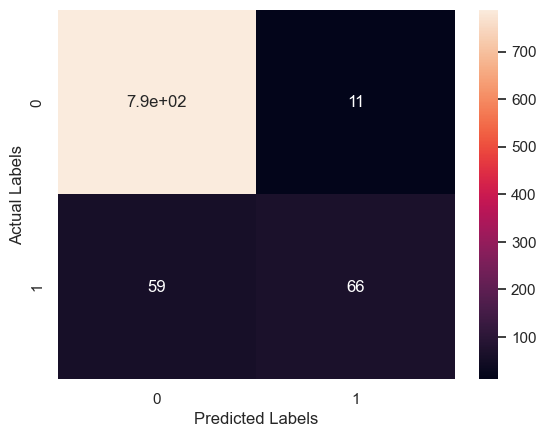

In [146]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Display the plot
plt.show()

In [148]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


4.SMOTE

In [157]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
# from sklearn.metrics import classification_report

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training the Decision Tree model with balanced class weights
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)
# Predicting and evaluating
acc=accuracy_score(y_test,y_predict)
acc


0.9242424242424242

In [163]:
precision=precision_score(y_test,y_predict)
precision
recall=recall_score(y_test,y_predict)
recall

0.528

In [165]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       799
           1       0.86      0.53      0.65       125

    accuracy                           0.92       924
   macro avg       0.89      0.76      0.81       924
weighted avg       0.92      0.92      0.92       924



In [167]:
model = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='gini',random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_predict = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.829004329004329

5.Using Hyperparameter tuning with GridSearchCV

In [172]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10))#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=5, cv=5)
tree_cv.fit(X_train,y_train)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params}")   # printing  best parameters

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}


In [174]:
#best_params={'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 7, 'splitter': 'random'}
dt1=DecisionTreeClassifier(**best_params)
dt1.fit(X_train,y_train)
y_pred=dt1.predict(X_test)
accuracy_score(y_test,y_predict)

0.829004329004329

6.Using RandomForest Classifier

In [177]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)
accuracy_score(y_test,y_predict)

0.9556277056277056

In [179]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       799
           1       0.91      0.74      0.82       125

    accuracy                           0.96       924
   macro avg       0.94      0.87      0.90       924
weighted avg       0.95      0.96      0.95       924



7.Use Hyperparameter tuning with GridSearchCV


In [184]:
n_estimators = [100,150,200,250,300]  
max_features = ['auto', 'sqrt','log2']
max_depth = [10,20,30]
max_depth.append(None)
min_samples_split = [5, 10]
min_samples_leaf = [2, 4]

#dictionary for hyperparameters
random_grid = {'n_estimators': [100,150,200,250,300] , 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='accuracy',param_grid= random_grid, cv=3,
                               verbose=2, n_jobs=-1)
rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best paramters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250})


In [186]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250)

In [188]:
y_predict=rf_clf2.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.961038961038961

In [190]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       799
           1       0.94      0.76      0.84       125

    accuracy                           0.96       924
   macro avg       0.95      0.88      0.91       924
weighted avg       0.96      0.96      0.96       924



8.Using GradientBoosting Classifier:


In [193]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state=42)
gbm.fit(X_train,y_train)
y_predict=gbm.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9512987012987013

In [195]:
pip install xgboost

9.Using XGboost:

In [198]:
from xgboost import XGBClassifier
Xgb=XGBClassifier(random_state=42)
Xgb.fit(X_train,y_train)
y_predict=Xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.95995670995671

Model Comparison Report

In [208]:
model_results = pd.DataFrame(columns=['Model', 'Accuracy'])
models = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree','Random Forest','SMOTE','XGBoost']
accuracy = [0.86,0.95,0.92,0.96,0.92,0.95]

# Populate the DataFrame
model_results['Model'] = models
model_results['Accuracy'] = accuracy

# Display the results
model_results

Model  Accuracy
0  Logistic Regression      0.86
1    Gradient Boosting      0.95
2        Decision Tree      0.92
3        Random Forest      0.96
4                SMOTE      0.92
5              XGBoost      0.95

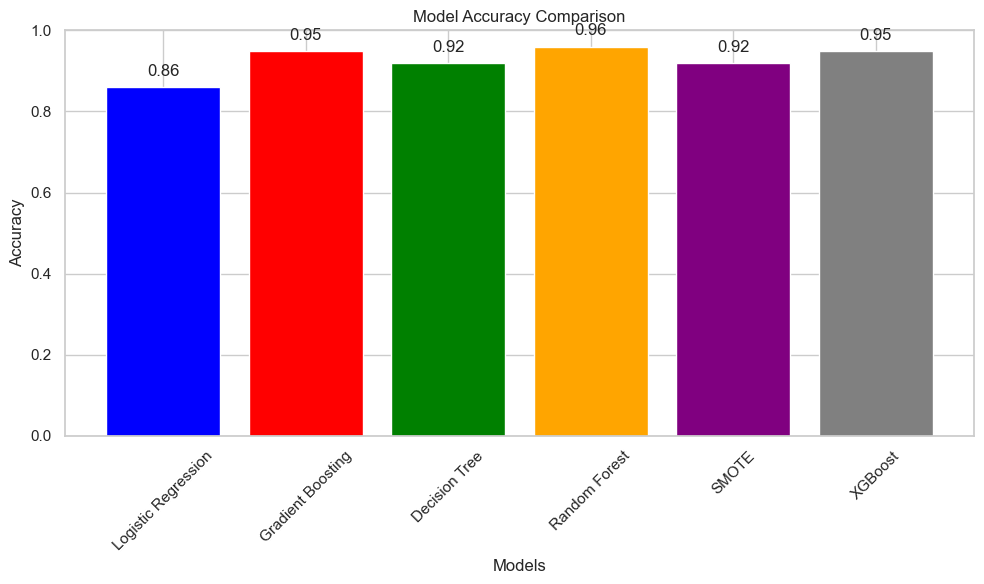

In [210]:
# Create a bar chart to visualize model accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'red', 'green', 'orange', 'purple', 'gray'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.xticks(rotation=45)  # Rotate model names for better visibility

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()

Logistic Regression (Accuracy: 0.86)
Insights: The model seems to have a best accuracy compared to other models. It's possible that the data might not be linearly separable, which is an assumption of logistic regression.

Gradient Boosting  (Accuracy: 0.95)
Insights: The accuracy is moderate. 

Decision Tree (Accuracy: 0.92)
Insights: Decision trees are interpretable and can capture nonlinear relationships well. The accuracy is decent.

Random Forest (Accuracy: 0.96)
Insights: Random Forests are an ensemble of decision trees, and they are performing very well with high accuracy.

SMOTE (Accuracy: 0.92)
Insights: The accuracy is moderate. SMOTE performance can be affected by the choice of the kernel and hyperparameter settings.

XGBoost (Accuracy: 0.95)
Insights: XGBoost is a powerful ensemble method, and it's performing exceptionally well with high accuracy.

Conclusion:
The analysis revealed several data challenges, including imbalanced classes and outliers. Hyperparameter tuning strategies were employed to optimize model performance, with Random Forest,Gradient Boosting and XGBoost emerging as top performers.

In [233]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter distribution to sample from
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [50, 100, 200, 300, 400],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Display the best cross-validated accuracy
print("Best Cross-validated Accuracy:", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)

# Display test set results
print("\nTest Set Results:")
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.001, 'colsample_bytree': 1.0}
Best Cross-validated Accuracy: 0.8564851791954997

Test Set Results:
Accuracy: 0.7835497835497836
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       798
           1       0.14      0.12      0.13       126

    accuracy                           0.78       924
   macro avg       0.50      0.50      0.50       924
weighted avg       0.77      0.78      0.77       924



Feature Importance

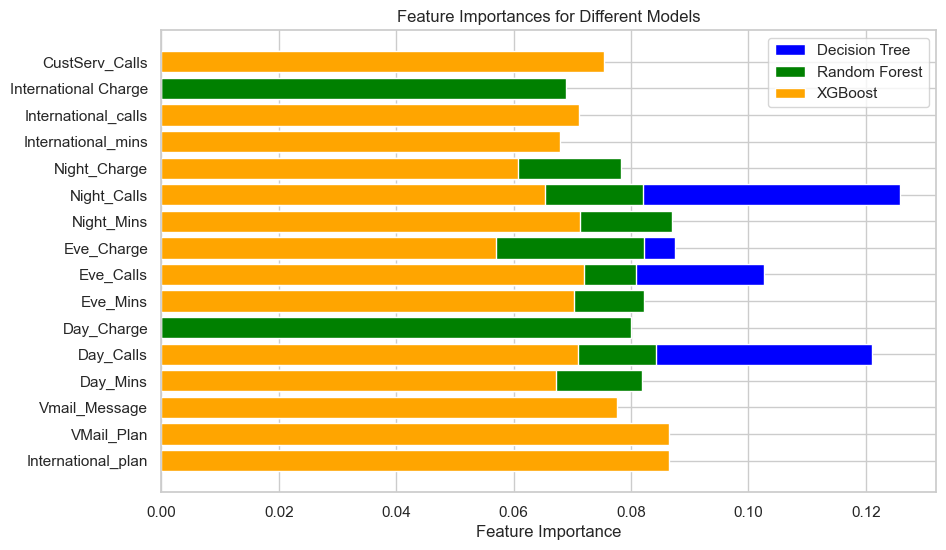

In [235]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
dt_feature_importances = dt_model.feature_importances_
rf_feature_importances = rf_model.feature_importances_
xgb_feature_importances = xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'DecisionTree': dt_feature_importances,
    'RandomForest': rf_feature_importances,
    'XGBoost': xgb_feature_importances
})

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['DecisionTree'], color='blue', label='Decision Tree')
plt.barh(feature_importances_df['Feature'], feature_importances_df['RandomForest'], color='green', label='Random Forest')
plt.barh(feature_importances_df['Feature'], feature_importances_df['XGBoost'], color='orange', label='XGBoost')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Different Models')
plt.legend()
plt.show()

Creating Churn risk scores that can be indicative to drive retention campaigns.

In [237]:
x=data.drop('Churn',axis=1)
y=data['Churn']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

#Make predictions on the test set
y_pred = model.predict(x_test)

#Assign churn risk scores
churn_probabilities = model.predict_proba(x_test)[:,1]  # Probability of churn
data_probabilities = pd.concat([x_test.reset_index(drop=False), pd.Series(y_pred, name='Predicted Churn'), pd.Series(churn_probabilities, name='Churn Probability')], axis=1)

# Display the test set with churn risk scores
data_probabilities

index  International_plan  VMail_Plan  Vmail_Message  Day_Mins  \
0     3308                   0           0              0     211.3   
1      296                   0           0              0      85.7   
2     4060                   0           1             22     219.0   
3     3564                   0           0              0     211.1   
4     1224                   0           0              0     178.4   
..     ...                 ...         ...            ...       ...   
919    605                   0           0              0     335.5   
920   1125                   0           0              0     142.3   
921    942                   0           0              0     226.2   
922   3448                   0           0              0     219.0   
923   1626                   0           0              0     207.3   

     Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  \
0           87       35.92     165.7         97       14.08       265.9   
1           83       14.57     247.7         67       21.05       142.4   
2          126       37.23     311.9        126       26.51       197.0   
3           62       35.89     235.2        143       19.99       227.5   
4           97       30.33     168.3        113       14.31       120.5   
..         ...         ...       ...        ...         ...         ...   
919         77       57.04     212.5        109       18.06       265.0   
920         75       24.19     122.8        106       10.44       229.5   
921         88       38.45     140.3        114       11.93       208.9   
922        100       37.23     148.9        110       12.66       151.8   
923        115       35.24     198.4         82       16.86       114.1   

     Night_Calls  Night_Charge  International_mins  International_calls  \
0             72         11.97                13.3                    6   
1             85          6.41                10.1                    5   
2            112          8.87                 9.0                    8   
3             66         10.24                15.6                    3   
4             93          5.42                 9.3                    9   
..           ...           ...                 ...                  ...   
919          132         11.93                12.7                    8   
920           94         10.33                12.8                    9   
921          110          9.40                 6.4                    2   
922          129          6.83                11.9                    8   
923           83          5.13                 8.6                    4   

     International Charge  CustServ_Calls  Predicted Churn  Churn Probability  
0                    3.59               1                0           0.001849  
1                    2.73               2                0           0.000985  
2                    2.43               3                0           0.026608  
3                    4.21               2                0           0.000392  
4                    2.51               1                0           0.000193  
..                    ...             ...              ...                ...  
919                  3.43               2                1           0.999268  
920                  3.46               2                0           0.000900  
921                  1.73               0                0           0.005792  
922                  3.21               3                0           0.000484  
923                  2.32               1                0           0.007946  

[924 rows x 19 columns]

In [243]:
risk_score=len(data_probabilities.loc[data_probabilities['Predicted Churn']==1])/len(x_test)*200
print("Risk Score is",round(risk_score),"%")

Risk Score is 21 %


Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

In [246]:
data_probabilities.rename(columns={'Predicted Churn': 'CHURN-FLAG'}, inplace=True)

In [248]:
target_cust=data_probabilities.loc[data_probabilities['CHURN-FLAG']==1]
target_cust

index  International_plan  VMail_Plan  Vmail_Message  Day_Mins  \
6     2536                   0           0              0     294.2   
14    1712                   0           0              0     174.5   
48    1346                   1           0              0     133.7   
52    4268                   1           0              0     176.1   
56    1533                   1           0              0     242.2   
..     ...                 ...         ...            ...       ...   
873    230                   1           0              0     312.0   
893   3751                   0           0              0     261.0   
896    338                   0           0              0     233.8   
902   1350                   0           0              0     285.7   
919    605                   0           0              0     335.5   

     Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  \
6          100       50.01     232.5         53       19.76       195.0   
14          73       29.67     213.7        114       18.16       164.7   
48          45       22.73     187.8        107       15.96       181.9   
52          88       29.94     244.5         84       20.78       189.9   
56         102       41.17     226.1         80       19.22       252.0   
..         ...         ...       ...        ...         ...         ...   
873        109       53.04     129.4        100       11.00       217.6   
893         83       44.37     144.2         95       12.26       284.4   
896        104       39.75     266.5         94       22.65       212.7   
902        124       48.57     230.9        106       19.63       230.7   
919         77       57.04     212.5        109       18.06       265.0   

     Night_Calls  Night_Charge  International_mins  International_calls  \
6             64          8.78                 9.0                    1   
14           116          7.41                10.3                    5   
48            89          8.19                10.7                    2   
52            99          8.55                11.2                    1   
56            96         11.34                13.9                    5   
..           ...           ...                 ...                  ...   
873           74          9.79                10.5                    2   
893          119         12.80                16.3                    1   
896          104          9.57                 7.6                    3   
902          140         10.38                14.8                    7   
919          132         11.93                12.7                    8   

     International Charge  CustServ_Calls  CHURN-FLAG  Churn Probability  
6                    2.43               0           1           0.999620  
14                   2.78               4           1           0.661508  
48                   2.89               1           1           0.953637  
52                   3.02               2           1           0.978908  
56                   3.75               2           1           0.999716  
..                    ...             ...         ...                ...  
873                  2.84               0           1           0.916122  
893                  4.40               4           1           0.949696  
896                  2.05               2           1           0.770487  
902                  4.00               0           1           0.995646  
919                  3.43               2           1           0.999268  

[96 rows x 19 columns]

Data Science PROJECT

Client: No-Churn Telecom | Category: Telecom – Churn Rate ML

Project Ref: PM-PR-0017